# <font color= #6B6B6B> 1. Data Description </font>

In [1]:
#Basic Modules
import pandas as pd
import numpy as np
#plots
import seaborn as sns
import plotly.graph_objects as go
#Data Handling
from sklearn.preprocessing import (Normalizer,StandardScaler,MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder

# Genetic Modules
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
from cycler import cycler
#Log Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score,
                             f1_score,balanced_accuracy_score)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

Description of datasets and info used, info from january 1st 2021 to end of september 2022, ohlc of prices from binance, BTCUSDT. for trials a dataset from only august is used, frequency is per minute.

data obtained from https://data.binance.vision/?prefix=data/spot/monthly/klines/BTCUSDT/1m/

In [3]:
route = 'C:/Users/Emilio/Desktop/TOG Exp/Datasets/'
# data = pd.read_parquet(route+'ohlcV.parquet')
# data = pd.read_parquet(route+'ohlc-2017.parquet')
# data = pd.read_parquet(route + 'ohlc-2021.parquet')
data = pd.read_parquet(route + 'ohlc1.parquet')
data = data.drop(['drop', 'close_time'], axis=1)
data.head()

open      high       low     close     volume  \
timestamp                                                                
2022-08-01 00:00:00  23296.36  23296.78  23262.27  23280.77  202.57486   
2022-08-01 00:01:00  23280.77  23317.68  23263.01  23313.09  153.76413   
2022-08-01 00:02:00  23316.78  23317.72  23271.23  23287.89  119.87883   
2022-08-01 00:03:00  23287.89  23291.08  23263.02  23278.59  100.59952   
2022-08-01 00:04:00  23275.48  23297.48  23266.27  23277.42   74.75517   

                     quote_asset_volume  trades  buy_asset_volume  \
timestamp                                                           
2022-08-01 00:00:00        4.715691e+06    5988          98.30337   
2022-08-01 00:01:00        3.580741e+06    5474          83.70472   
2022-08-01 00:02:00        2.792681e+06    4154          48.58543   
2022-08-01 00:03:00        2.341383e+06    4169          50.14998   
2022-08-01 00:04:00        1.740367e+06    3539          37.88062   

                     taker_buy_asset_volume  
timestamp                                    
2022-08-01 00:00:00            2.288439e+06  
2022-08-01 00:01:00            1.949636e+06  
2022-08-01 00:02:00            1.131939e+06  
2022-08-01 00:03:00            1.167198e+06  
2022-08-01 00:04:00            8.819088e+05

In [3]:
print(data.shape)
print(data.isnull().sum())

(44640, 9)
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
trades                    0
buy_asset_volume          0
taker_buy_asset_volume    0
dtype: int64


In [4]:
# %% Quick description of the data
desc = data.describe()
info = data.info()
print(desc, info)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44640 entries, 2022-08-01 00:00:00 to 2022-08-31 23:59:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    44640 non-null  float64
 1   high                    44640 non-null  float64
 2   low                     44640 non-null  float64
 3   close                   44640 non-null  float64
 4   volume                  44640 non-null  float64
 5   quote_asset_volume      44640 non-null  float64
 6   trades                  44640 non-null  int64  
 7   buy_asset_volume        44640 non-null  float64
 8   taker_buy_asset_volume  44640 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.4 MB
               open          high           low         close        volume  \
count  44640.000000  44640.000000  44640.000000  44640.000000  44640.000000   
mean   22470.411851  22481.868341  22458.947005  22470.333063    1

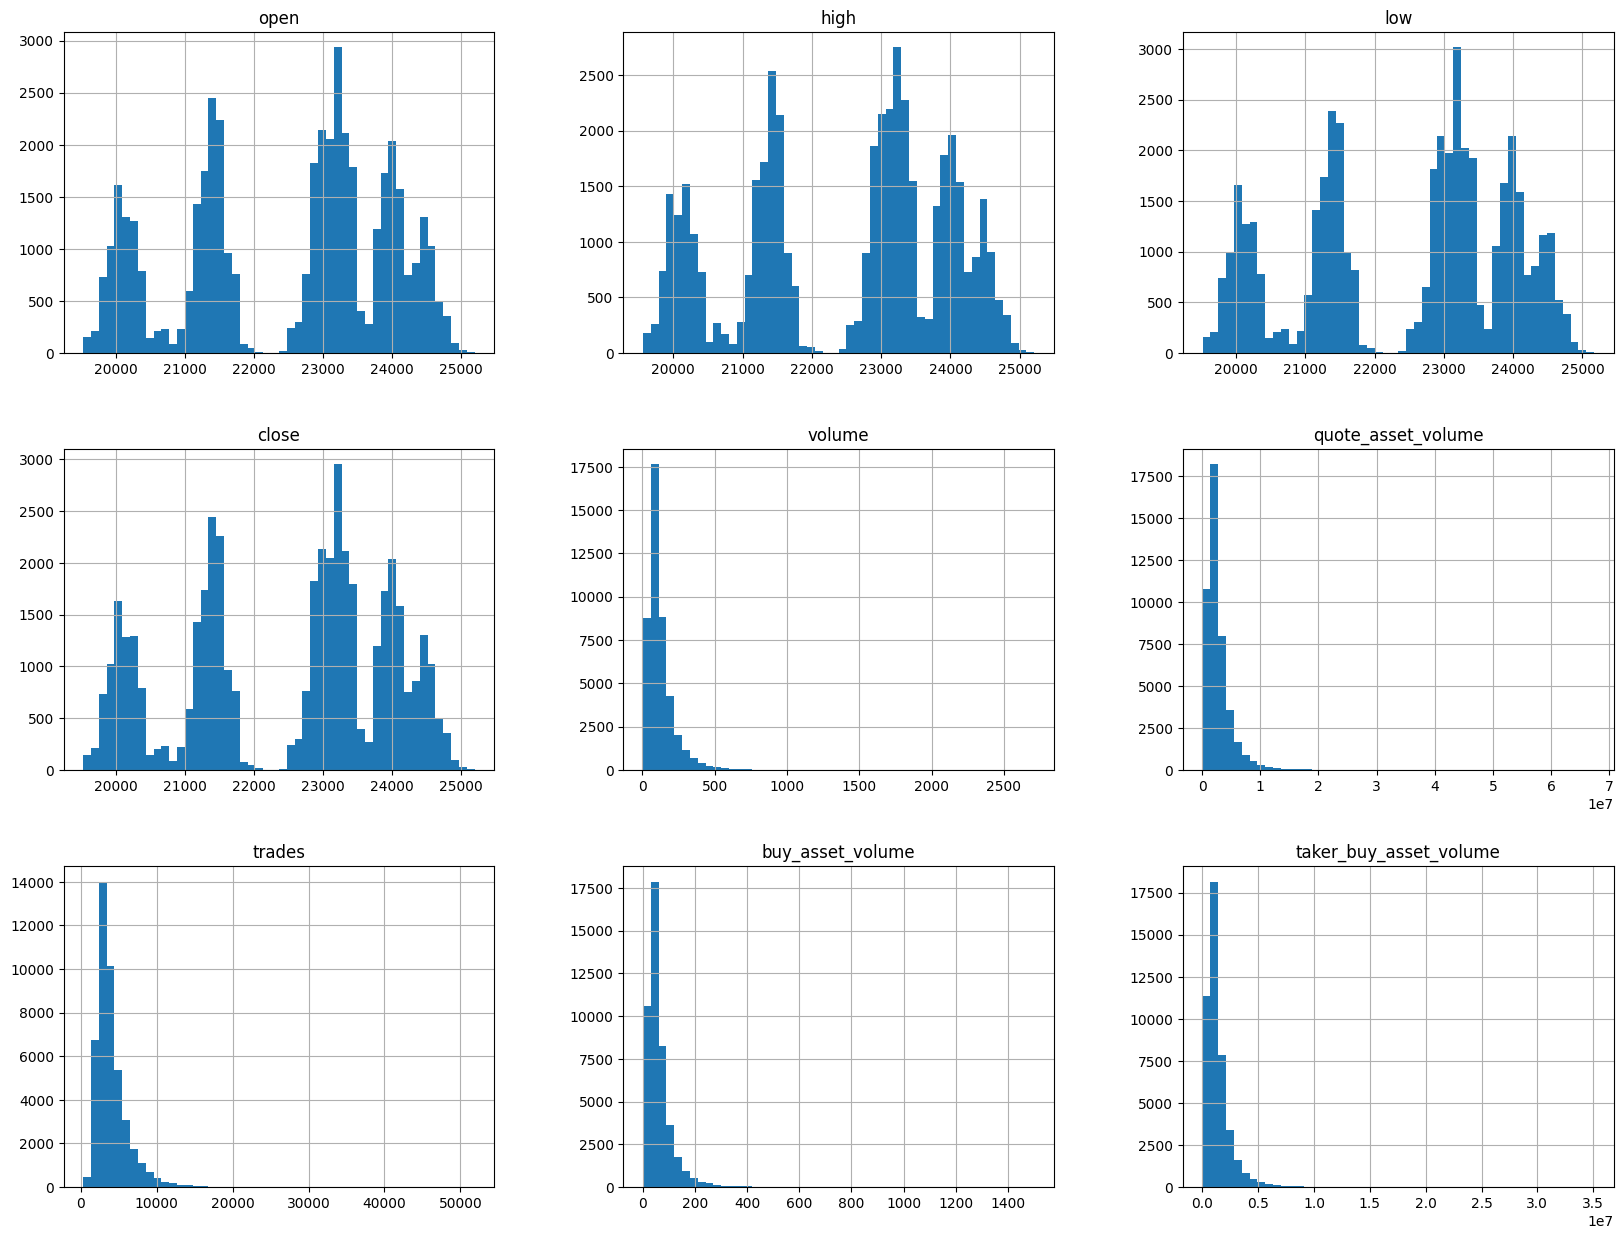

<AxesSubplot:xlabel='timestamp'>

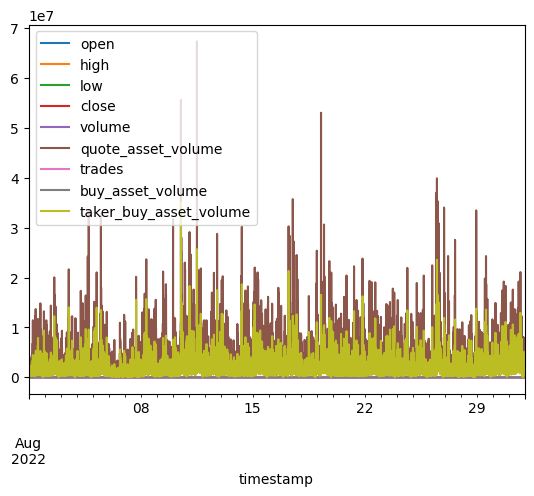

In [5]:
# %%
# %matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()

data.plot()

Description of variables:

Timestamp = time series serving as index, it goes in intervals of 1 minute, from the beggining of 2022, until the end of august.
OHLC variables , this are numeric , based on the prices of the cross between BTC and USDT

Open is a numeric variable, expressing the first price, at the beginning of the epoch.
High is a numeric variable, expressing the max value of the epoch.
Low is the variable expressing the min value of the epoch observed.
Close is the last value of the epoch.
Volume variables, numeric serve as the total quantity observed on the epoch.

Next we do a resampling, to transform the series from micro time to intra day , the period chosen was 1 hour

In [5]:
# %% Resampling
rs = '1H'
data1 = data.copy()
data1['open'] = data1['open'].resample(rs).first()
data1['high'] = data1['high'].resample(rs).max()
data1['low'] = data1['low'].resample(rs).min()
data1['close'] = data1['close'].resample(rs).last()
data1['volume'] = data1['volume'].resample(rs).sum()
data1['quote_asset_volume'] = data1['quote_asset_volume'].resample(rs).sum()
data1['trades'] = data1['trades'].resample(rs).sum()
data1['buy_asset_volume'] = data1['buy_asset_volume'].resample(rs).sum()
data1['taker_buy_asset_volume'] = data1['taker_buy_asset_volume'].resample(rs).sum()
data1 = data1.resample(rs).sum()
print(data1.shape)
data1.head()


(744, 9)


open      high       low     close      volume  \
timestamp                                                                 
2022-08-01 00:00:00  23296.36  23394.97  23257.37  23374.96  5110.59195   
2022-08-01 01:00:00  23376.65  23443.38  23323.52  23418.80  3835.70981   
2022-08-01 02:00:00  23418.80  23466.55  23371.23  23420.08  3510.57616   
2022-08-01 03:00:00  23420.08  23436.83  23313.38  23375.62  3051.23770   
2022-08-01 04:00:00  23376.59  23417.76  23344.65  23392.40  3465.72905   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-01 00:00:00        1.192090e+08  184426.0        2652.53834   
2022-08-01 01:00:00        8.973913e+07  156253.0        1929.95992   
2022-08-01 02:00:00        8.222161e+07  143965.0        1741.44104   
2022-08-01 03:00:00        7.128112e+07  135771.0        1482.54058   
2022-08-01 04:00:00        8.104752e+07  131321.0        1684.84243   

                     taker_buy_asset_volume  
timestamp                                    
2022-08-01 00:00:00            6.187558e+07  
2022-08-01 01:00:00            4.515590e+07  
2022-08-01 02:00:00            4.078711e+07  
2022-08-01 03:00:00            3.463491e+07  
2022-08-01 04:00:00            3.940219e+07

<AxesSubplot:xlabel='timestamp'>

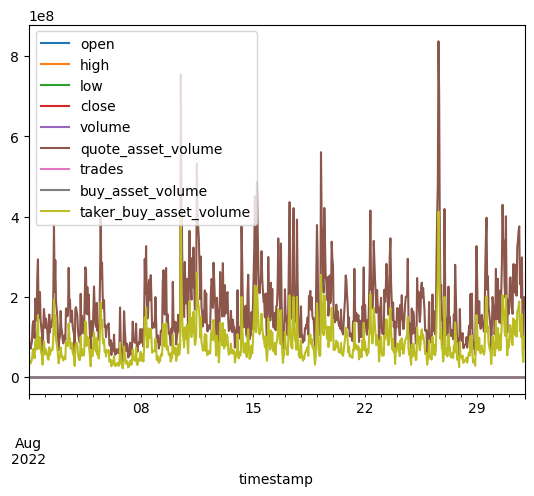

In [6]:
data1.plot()

In [7]:
# %% Feature Engineering

ohlcv = data1.copy()
# OHLC Chart
fig = go.Figure(data=go.Ohlc(x=ohlcv.index,
                             open=ohlcv['open'],
                             high=ohlcv['high'],
                             low=ohlcv['low'],
                             close=ohlcv['close']))

fig.show()


# <font color= #6B6B6B> 2. Feature Engineering </font>

#### FEATURES BASIC STATISTICS:
Next we will create the first features based on the OHLCV dataset.
* Volatility(HL):  $ V_t=H_t-L_t$
* High - open(HO): $ HO_t=H_t-O_t$
* Open - low(OL):  $ OL_t=O_t-L_t$
* High - Low(HL):  $ HL_t=H_t-L_t $
* Close - Open(CO): $CO_t=C_t-O_t$


In [8]:
# Volatility
volatility = []
for i in range(len(ohlcv)):
    vol = ohlcv['high'][i] - ohlcv['low'][i]
    volatility.append(vol)
ohlcv['volatility'] = volatility

# micro trends
high_open = []
for i in range(len(ohlcv)):
    ho = ohlcv['high'][i] - ohlcv['open'][i]
    high_open.append(ho)
ohlcv['high_open'] = high_open

open_low = []
for i in range(len(ohlcv)):
    ol = ohlcv['open'][i] - ohlcv['low'][i]
    open_low.append(ol)
ohlcv['open_low'] = open_low

close_open = []
for i in range(len(ohlcv)):
    co = ohlcv['close'][i] - ohlcv['open'][i]
    close_open.append(co)
ohlcv['close_open'] = close_open
ohlcv.head()

ohlcv2 = ohlcv.copy()
ohlcv2.head()

open      high       low     close      volume  \
timestamp                                                                 
2022-08-01 00:00:00  23296.36  23394.97  23257.37  23374.96  5110.59195   
2022-08-01 01:00:00  23376.65  23443.38  23323.52  23418.80  3835.70981   
2022-08-01 02:00:00  23418.80  23466.55  23371.23  23420.08  3510.57616   
2022-08-01 03:00:00  23420.08  23436.83  23313.38  23375.62  3051.23770   
2022-08-01 04:00:00  23376.59  23417.76  23344.65  23392.40  3465.72905   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-01 00:00:00        1.192090e+08  184426.0        2652.53834   
2022-08-01 01:00:00        8.973913e+07  156253.0        1929.95992   
2022-08-01 02:00:00        8.222161e+07  143965.0        1741.44104   
2022-08-01 03:00:00        7.128112e+07  135771.0        1482.54058   
2022-08-01 04:00:00        8.104752e+07  131321.0        1684.84243   

                     taker_buy_asset_volume  volatility  high_open  open_low  \
timestamp                                                                      
2022-08-01 00:00:00            6.187558e+07      137.60      98.61     38.99   
2022-08-01 01:00:00            4.515590e+07      119.86      66.73     53.13   
2022-08-01 02:00:00            4.078711e+07       95.32      47.75     47.57   
2022-08-01 03:00:00            3.463491e+07      123.45      16.75    106.70   
2022-08-01 04:00:00            3.940219e+07       73.11      41.17     31.94   

                     close_open  
timestamp                        
2022-08-01 00:00:00       78.60  
2022-08-01 01:00:00       42.15  
2022-08-01 02:00:00        1.28  
2022-08-01 03:00:00      -44.46  
2022-08-01 04:00:00       15.81

In [9]:
# %% Rolling stats
ohlcv2 = ohlcv2.drop(['quote_asset_volume', 'buy_asset_volume', 'taker_buy_asset_volume', 'trades'], axis=1)


def autoregressive_features(p_data, p_memory):
    """
    Creacion de variables de naturaleza autoregresiva (resagos, promedios, diferencias)
    Parameters
    ----------
    p_data: pd.DataFrame
        with OHLCV columns: Open, High, Low, Close, Volume
    p_memory: int
        A value that represents the implicit assumption of a "memory" effect in the prices
    Returns
    -------
    r_features: pd.DataFrame

    """

    # work with a separate copy of original data
    data = ohlcv2.copy()

    # nth-period final price "movement"
    data['co'] = (data['close'] - data['open'])
    # nth-period uptrend movement
    data['ho'] = (data['high'] - data['open'])
    # nth-period downtrend movement
    data['ol'] = (data['open'] - data['low'])
    # nth-period volatility measure
    data['hl'] = (data['high'] - data['low'])

    # N features with window-based calculations
    for n in range(0, p_memory):
        data['ma_ol'] = data['ol'].rolling(n + 2).mean()
        data['ma_ho'] = data['ho'].rolling(n + 2).mean()
        data['ma_hl'] = data['hl'].rolling(n + 2).mean()

        data['lag_ol_' + str(n + 1)] = data['ol'].shift(n + 1)
        data['lag_ho_' + str(n + 1)] = data['ho'].shift(n + 1)
        data['lag_hl_' + str(n + 1)] = data['hl'].shift(n + 1)

        data['sd_ol_' + str(n + 1)] = data['ol'].rolling(n + 1).std()
        data['sd_ho_' + str(n + 1)] = data['ho'].rolling(n + 1).std()
        data['sd_hl_' + str(n + 1)] = data['hl'].rolling(n + 1).std()

        data['lag_vol_' + str(n + 1)] = data['volume'].shift(n + 1)
        data['sum_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).sum()
        data['mean_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).mean()

    # timestamp as index
    data.index = pd.to_datetime(data.index)
    # select columns, drop for NAs, change column types, reset index
    r_features = data.drop(['open', 'high', 'low', 'close', 'hl', 'ol', 'ho', 'volume'], axis=1)
    r_features = r_features.dropna(axis='columns', how='all')
    # r_features = r_features.dropna(axis='rows')
    r_features.iloc[:, 1:] = r_features.iloc[:, 1:].astype(float)
    r_features.reset_index(inplace=True, drop=True)

    return r_features

In [10]:
p_memory = 24
data_ar = autoregressive_features(p_data=ohlcv2, p_memory=p_memory)
data_ar.index = ohlcv2.index

C:\Users\Emilio\AppData\Local\Temp\ipykernel_1028\47143235.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_1028\47143235.py:42: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_1028\47143235.py:43: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [11]:
ohlcv = pd.merge(ohlcv, data_ar, on='timestamp')
ohlcv = ohlcv.dropna(axis='rows')
ohlcv

open      high       low     close       volume  \
timestamp                                                                  
2022-08-02 00:00:00  23266.90  23447.62  23160.02  23187.65   6217.40017   
2022-08-02 01:00:00  23187.65  23245.00  22944.00  22997.14   5332.19631   
2022-08-02 02:00:00  22997.14  23080.37  22824.77  22912.95   6362.84295   
2022-08-02 03:00:00  22912.95  22922.29  22780.00  22853.11   5949.36117   
2022-08-02 04:00:00  22851.34  22900.93  22750.00  22862.28   5073.96401   
...                       ...       ...       ...       ...          ...   
2022-08-31 19:00:00  20001.18  20328.46  19987.72  20228.57  14801.57029   
2022-08-31 20:00:00  20228.57  20243.97  20161.47  20195.10   6181.43435   
2022-08-31 21:00:00  20193.43  20299.97  20160.00  20280.54   3515.16259   
2022-08-31 22:00:00  20280.54  20292.75  20085.70  20155.00   9926.63922   
2022-08-31 23:00:00  20155.00  20157.53  19966.00  20050.02   8540.54148   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-02 00:00:00        1.447431e+08  209914.0        3063.09720   
2022-08-02 01:00:00        1.230993e+08  190925.0        2471.01766   
2022-08-02 02:00:00        1.459598e+08  210472.0        3049.25511   
2022-08-02 03:00:00        1.359508e+08  211925.0        2757.16274   
2022-08-02 04:00:00        1.158491e+08  184834.0        2426.21841   
...                                 ...       ...               ...   
2022-08-31 19:00:00        2.987315e+08  302584.0        7788.14642   
2022-08-31 20:00:00        1.248913e+08  135138.0        3099.80045   
2022-08-31 21:00:00        7.106110e+07   89943.0        1887.18072   
2022-08-31 22:00:00        2.001151e+08  214212.0        5043.89695   
2022-08-31 23:00:00        1.711136e+08  210227.0        4306.62313   

                     taker_buy_asset_volume  volatility_x  ...   mean_vol_23  \
timestamp                                                  ...                 
2022-08-02 00:00:00            7.132371e+07        287.60  ...   6151.359157   
2022-08-02 01:00:00            5.706484e+07        301.00  ...   6230.560033   
2022-08-02 02:00:00            6.995256e+07        255.60  ...   6374.542870   
2022-08-02 03:00:00            6.300921e+07        142.29  ...   6482.526875   
2022-08-02 04:00:00            5.539996e+07        150.93  ...   6535.162740   
...                                     ...           ...  ...           ...   
2022-08-31 19:00:00            1.571750e+08        340.74  ...  11829.262030   
2022-08-31 20:00:00            6.263104e+07         82.50  ...  11854.072125   
2022-08-31 21:00:00            3.815540e+07        139.97  ...  11583.353280   
2022-08-31 22:00:00            1.016909e+08        207.05  ...  11669.828964   
2022-08-31 23:00:00            8.628293e+07        191.53  ...  11657.568740   

                     lag_ol_24  lag_ho_24  lag_hl_24   sd_ol_24   sd_ho_24  \
timestamp                                                                    
2022-08-02 00:00:00      38.99      98.61     137.60  83.884827  84.952291   
2022-08-02 01:00:00      53.13      66.73     119.86  86.832355  85.112312   
2022-08-02 02:00:00      47.57      47.75      95.32  85.914168  84.558472   
2022-08-02 03:00:00     106.70      16.75     123.45  85.809056  84.875971   
2022-08-02 04:00:00      31.94      41.17      73.11  83.561279  84.654959   
...                        ...        ...        ...        ...        ...   
2022-08-31 19:00:00      21.25     323.11     344.36  65.132983  84.309091   
2022-08-31 20:00:00     103.85     112.46     216.31  65.308532  86.248277   
2022-08-31 21:00:00     160.32      34.67     194.99  64.659617  85.081467   
2022-08-31 22:00:00     109.89      29.69     139.58  68.217924  85.817687   
2022-08-31 23:00:00     161.61      21.42     183.03  69.679242  86.684148   

                      sd_hl_24   lag_vol_24    sum_vol_2

# <font color= #6B6B6B> 3. Target Engineering: Classification problem sign  </font>

Our target feature will be called sign, sign is the micro-trend $CO_t$ which will be represented in a scale from -2 to 2.
* -2 =bigger down trend.
* -1 =little down trend.
* 0 = plateau.
* 1 = little Up trend.
* 2 = bigger up trend.

This will permit us to see the direction of the trend in price per epoch.

Sign is assigned to the epoch before the sign, so we are not overfitting nor using future information to predict the trend.


In [12]:
# %% Target Engineering y_hat:CO_{t}
treshold = 100

ohlc = pd.DataFrame(ohlcv)

y_hat = []

for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    y_hat.append(y_hat1)
for i in range(len(ohlc)):
    if y_hat[i] < -treshold:
        y_hat[i] = -2
    elif -treshold <= y_hat[i] < 0:
        y_hat[i] = -1
    elif y_hat[i] == 0:
        y_hat[i] = -1
    elif 0 < y_hat[i] <= treshold:
        y_hat[i] = 1
    else:
        y_hat[i] = 2
# cambiar y_hat por y_hat
ohlc['y_hat'] = y_hat
y_hat_test = y_hat
ohlc.head()

open      high       low     close      volume  \
timestamp                                                                 
2022-08-02 00:00:00  23266.90  23447.62  23160.02  23187.65  6217.40017   
2022-08-02 01:00:00  23187.65  23245.00  22944.00  22997.14  5332.19631   
2022-08-02 02:00:00  22997.14  23080.37  22824.77  22912.95  6362.84295   
2022-08-02 03:00:00  22912.95  22922.29  22780.00  22853.11  5949.36117   
2022-08-02 04:00:00  22851.34  22900.93  22750.00  22862.28  5073.96401   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-02 00:00:00        1.447431e+08  209914.0        3063.09720   
2022-08-02 01:00:00        1.230993e+08  190925.0        2471.01766   
2022-08-02 02:00:00        1.459598e+08  210472.0        3049.25511   
2022-08-02 03:00:00        1.359508e+08  211925.0        2757.16274   
2022-08-02 04:00:00        1.158491e+08  184834.0        2426.21841   

                     taker_buy_asset_volume  volatility_x  ...  lag_ol_24  \
timestamp                                                  ...              
2022-08-02 00:00:00            7.132371e+07        287.60  ...      38.99   
2022-08-02 01:00:00            5.706484e+07        301.00  ...      53.13   
2022-08-02 02:00:00            6.995256e+07        255.60  ...      47.57   
2022-08-02 03:00:00            6.300921e+07        142.29  ...     106.70   
2022-08-02 04:00:00            5.539996e+07        150.93  ...      31.94   

                     lag_ho_24  lag_hl_24   sd_ol_24   sd_ho_24   sd_hl_24  \
timestamp                                                                    
2022-08-02 00:00:00      98.61     137.60  83.884827  84.952291  88.736681   
2022-08-02 01:00:00      66.73     119.86  86.832355  85.112312  88.470800   
2022-08-02 02:00:00      47.75      95.32  85.914168  84.558472  84.846132   
2022-08-02 03:00:00      16.75     123.45  85.809056  84.875971  83.959132   
2022-08-02 04:00:00      41.17      73.11  83.561279  84.654959  79.220870   

                     lag_vol_24    sum_vol_24  mean_vol_24  y_hat  
timestamp                                                          
2022-08-02 00:00:00  5110.59195  145316.97041  6054.873767     -1  
2022-08-02 01:00:00  3835.70981  146813.45691  6117.227371     -2  
2022-08-02 02:00:00  3510.57616  149665.72370  6236.071821     -1  
2022-08-02 03:00:00  3051.23770  152563.84717  6356.826965     -1  
2022-08-02 04:00:00  3465.72905  154172.08213  6423.836755      1  

[5 rows x 235 columns]

In [13]:
ohlc['y_hat'] = y_hat
ohlc['y_hat'] = ohlc['y_hat'].shift(-1)
# ohlc.dropna(inplace = True, axis=0)
ohlc.head()
ohlc['y_hat'].value_counts()


 1.0    273
-1.0    260
-2.0    100
 2.0     86
Name: y_hat, dtype: int64

In [14]:
mart = []
# cambiar threshold a variables, en vez de hardcode que defina las clases y puede ser asimetrica.
for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    mart.append(y_hat1)
for i in range(len(ohlc)):
    if mart[i] < -treshold:
        mart[i] = -2
    elif -treshold <= mart[i] < 0:
        mart[i] = -1
    elif mart[i] == 0:
        mart[i] = -1
    elif 0 < mart[i] <= treshold:
        mart[i] = 1
    else:
        mart[i] = 2


# <font color= #6B6B6B> 4. Target Engineering: Benchmarks  </font>

Then we will perform our first benchmark, the martingale, this method says that the price in $$E[X_{t}] = E[X_{t-1}]$$

In [15]:
# Martingale

ohlc['martingale'] = mart
ohlc['martingale'] = ohlc['martingale'].shift(+1)
ohlc = ohlc.fillna(-1)
ohlc2 = pd.DataFrame(ohlc)
ohlc2.to_csv('C:/Users/Emilio/Desktop/Thesis/ohlc2.csv')
ohlc2['martingale'].value_counts()


 1.0    273
-1.0    262
-2.0     99
 2.0     86
Name: martingale, dtype: int64

In [16]:
print(ohlc['y_hat'].describe())

count    720.000000
mean      -0.022222
std        1.333032
min       -2.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        2.000000
Name: y_hat, dtype: float64


In [17]:
accuracy_martingala = accuracy_score(y_hat_test, ohlc2['martingale']) * 100
recall_martingala = recall_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
precision_martingala = precision_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
f1_martingala = f1_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
balanced_martingala = balanced_accuracy_score(y_hat_test, ohlc2['martingale']) * 100

print('Accuracy:', accuracy_martingala, '%')
print('Recall:', recall_martingala, '%')
print('Precision:', precision_martingala, '%')
print('F1:', f1_martingala, '%')
print('Balanced Accuracy:', balanced_martingala, '%')


Accuracy: 30.694444444444446 %
Recall: 30.694444444444446 %
Precision: 30.66986660498111 %
F1: 30.682044437184864 %
Balanced Accuracy: 26.074109976275174 %


In [18]:
confusion_mart = confusion_matrix(ohlc2['y_hat'], ohlc2['martingale'])
print(confusion_mart)

[[ 18  42  31   9]
 [ 32  81 108  40]
 [ 32 113 100  28]
 [ 17  26  34   9]]


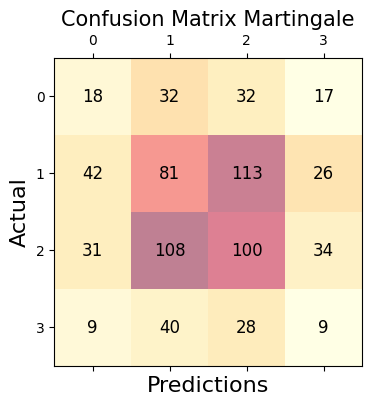

In [19]:
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(confusion_mart, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mart.shape[0]):
    for n in range(confusion_mart.shape[1]):
        px.text(x=m, y=n, s=confusion_mart[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Martingale', fontsize=15)
plt.show()

<AxesSubplot:>

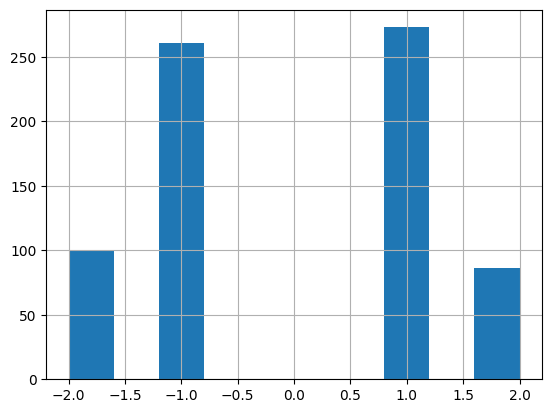

In [20]:
ohlc2['y_hat'].hist()


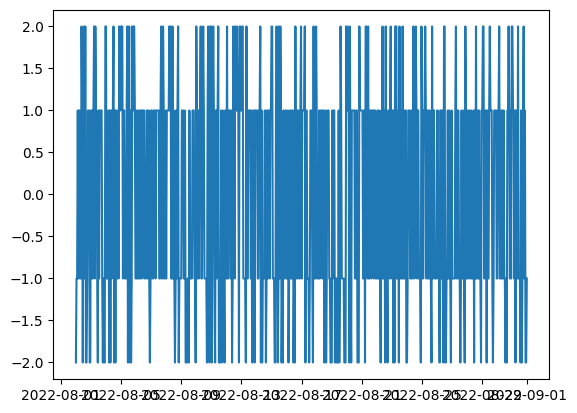

In [21]:
plt.plot(ohlc2['y_hat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21088c24dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x21088c25360>,
 'boxes': [<matplotlib.lines.Line2D at 0x21088c24af0>],
 'medians': [<matplotlib.lines.Line2D at 0x21088c25900>],
 'fliers': [<matplotlib.lines.Line2D at 0x21088c25bd0>],
 'means': []}

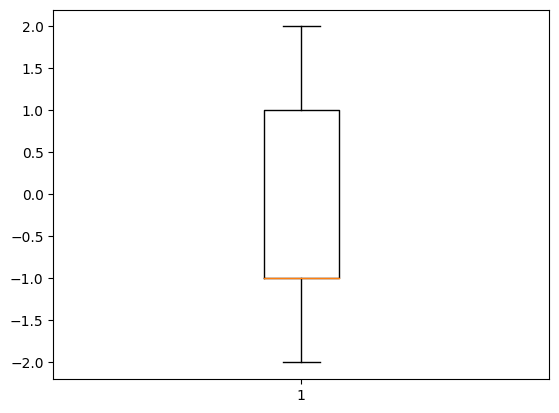

In [22]:
plt.boxplot(ohlc2['y_hat'], notch=None, vert=None, patch_artist=None, widths=None)

# <font color= #6B6B6B> 4.2. Feature Selection and feature transformation   </font>

Then we will apply different normalization and scaling methods to transform the data, then selecting the features to use on the following models, this because is a requirement for models like log regression, and also because we have different scales on the information.

                 open      high       low     close    volume  \
open         1.000000  0.998527  0.997694  0.996717 -0.128387   
high         0.998527  1.000000  0.997307  0.998233 -0.106736   
low          0.997694  0.997307  1.000000  0.998706 -0.164116   
close        0.996717  0.998233  0.998706  1.000000 -0.139510   
volume      -0.128387 -0.106736 -0.164116 -0.139510  1.000000   
...               ...       ...       ...       ...       ...   
lag_vol_24  -0.135439 -0.129273 -0.137909 -0.132250  0.278547   
sum_vol_24  -0.312912 -0.308455 -0.323424 -0.316740  0.382043   
mean_vol_24 -0.312912 -0.308455 -0.323424 -0.316740  0.382043   
y_hat       -0.004250 -0.004291 -0.000783 -0.003175 -0.095937   
martingale   0.055536  0.057877  0.060546  0.058086 -0.040166   

             quote_asset_volume    trades  buy_asset_volume  \
open                   0.008063  0.037384         -0.132221   
high                   0.030478  0.057894         -0.108175   
low                   -0.02781

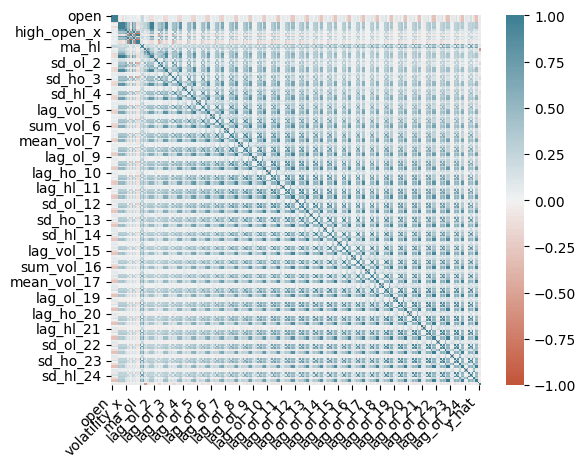

In [23]:
# Heat map
correlation = ohlc2.corr()
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

                 open      high       low     close    volume  \
open         1.000000  0.996003  0.995293  0.991971 -0.095277   
high         0.996003  1.000000  0.994071  0.995976 -0.065200   
low          0.995293  0.994071  1.000000  0.996379 -0.132864   
close        0.991971  0.995976  0.996379  1.000000 -0.100823   
volume      -0.095277 -0.065200 -0.132864 -0.100823  1.000000   
...               ...       ...       ...       ...       ...   
lag_vol_24  -0.092432 -0.081986 -0.093875 -0.086228  0.338905   
sum_vol_24  -0.216493 -0.210038 -0.227135 -0.219528  0.461765   
mean_vol_24 -0.216493 -0.210038 -0.227135 -0.219528  0.461765   
y_hat       -0.029799 -0.031099 -0.026435 -0.031355 -0.062741   
martingale   0.064889  0.067908  0.070425  0.065132 -0.056031   

             quote_asset_volume    trades  buy_asset_volume  \
open                   0.046245  0.074662         -0.096843   
high                   0.076821  0.102297         -0.064233   
low                    0.00842

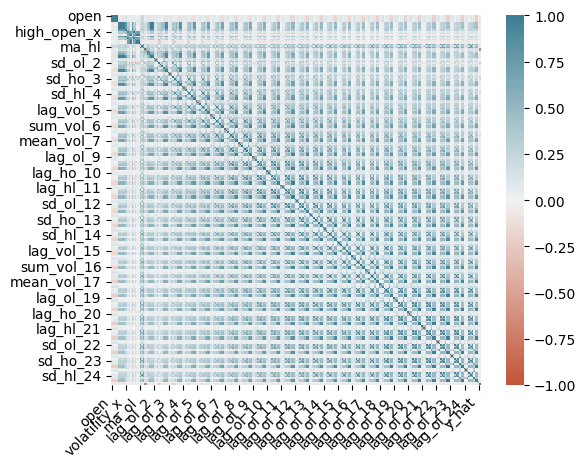

In [24]:
# Heat map spearman
correlation = ohlc2.corr(method='spearman')
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()


                 open      high       low     close    volume  \
open         1.000000  0.953092  0.948045  0.928324 -0.064368   
high         0.953092  1.000000  0.941072  0.952530 -0.042297   
low          0.948045  0.941072  1.000000  0.955944 -0.092208   
close        0.928324  0.952530  0.955944  1.000000 -0.068962   
volume      -0.064368 -0.042297 -0.092208 -0.068962  1.000000   
...               ...       ...       ...       ...       ...   
lag_vol_24  -0.065141 -0.056971 -0.066192 -0.060416  0.233457   
sum_vol_24  -0.161154 -0.155489 -0.171478 -0.164619  0.320244   
mean_vol_24 -0.161154 -0.155489 -0.171478 -0.164619  0.320244   
y_hat       -0.022818 -0.023371 -0.020301 -0.023974 -0.046495   
martingale   0.049489  0.051604  0.053629  0.049517 -0.043134   

             quote_asset_volume    trades  buy_asset_volume  \
open                   0.029319  0.048578         -0.065488   
high                   0.051577  0.069361         -0.041432   
low                    0.00168

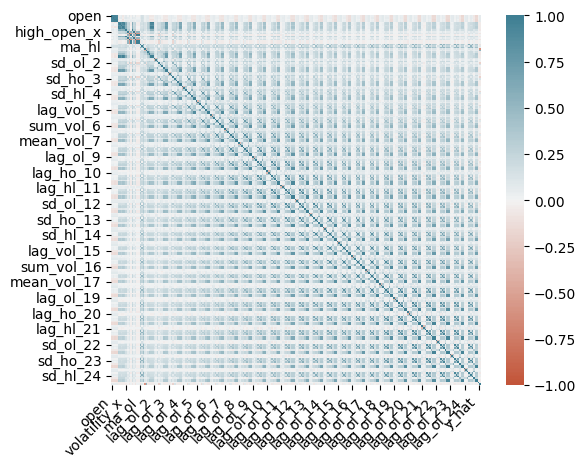

In [25]:
# Heat map kendall
correlation = ohlc2.corr(method='kendall')
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [26]:
# %% Separate the datasets
X = ohlc2.iloc[:, :-2]
X.head()
y = ohlc2['y_hat'].copy()
y_true = y.copy()
y.head()

timestamp
2022-08-02 00:00:00   -2.0
2022-08-02 01:00:00   -1.0
2022-08-02 02:00:00   -1.0
2022-08-02 03:00:00    1.0
2022-08-02 04:00:00   -1.0
Name: y_hat, dtype: float64

In [27]:
# Genetic Features

In [28]:
# %% Genetic features

# Dictionary
symbolic_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log', 'sin'],
                   'population': 10000, 'tournament': 500, 'hof': 50, 'generations': 15, 'n_features': 25,
                   'init_depth': (8, 12), 'init_method': 'half and half', 'parsimony': 0.01, 'constants': None,
                   'metric': 'pearson', 'metric_goal': 0.65,
                   'prob_cross': 0.4, 'prob_mutation_subtree': 0.3,
                   'prob_mutation_hoist': 0.1, 'prob_mutation_point': 0.2,
                   'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True}

In [29]:
# symbolic features
def symbolic_features(p_x, p_y, p_params):
    """
    Feature engineering process with symbolic variables by using genetic programming.
    Parameters
    ----------
    p_x: pd.DataFrame / np.array / list
        with regressors or predictor variables
        p_x = data_features.iloc[:, 1:]
    p_y: pd.DataFrame / np.array / list
        with variable to predict
        p_y = data_features.iloc[:, 0]
    p_params: dict
        with parameters for the genetic programming function
        p_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log'],
        'population': 5000, 'tournament':20, 'hof': 20, 'generations': 5, 'n_features':20,
        'init_depth': (4,8), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65,
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.3,
        'prob_mutation_hoist': 0.1. 'prob_mutation_point': 0.2,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }
    Returns
    -------
    results: dict
        With response information
        {'fit': model fitted, 'params': model parameters, 'model': model,
         'data': generated data with variables, 'best_programs': models best programs}
    References
    ----------
    https://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicTransformer


    **** NOTE ****
    simplified internal calculation for correlation (asuming w=1)

    y_pred_demean = y_pred - np.average(y_pred)
    y_demean = y - np.average(y)
                              np.sum(y_pred_demean * y_demean)
    pearson =  ---------------------------------------------------------------
                np.sqrt((np.sum(y_pred_demean ** 2) * np.sum(y_demean ** 2)))
    """

    # Function to produce Symbolic Features
    model = SymbolicTransformer(function_set=p_params['functions'], population_size=p_params['population'],
                                tournament_size=p_params['tournament'], hall_of_fame=p_params['hof'],
                                generations=p_params['generations'], n_components=p_params['n_features'],

                                init_depth=p_params['init_depth'], init_method=p_params['init_method'],
                                parsimony_coefficient=p_params['parsimony'],
                                const_range=p_params['constants'],

                                metric=p_params['metric'], stopping_criteria=p_params['metric_goal'],

                                p_crossover=p_params['prob_cross'],
                                p_subtree_mutation=p_params['prob_mutation_subtree'],
                                p_hoist_mutation=p_params['prob_mutation_hoist'],
                                p_point_mutation=p_params['prob_mutation_point'],
                                max_samples=1,

                                verbose=p_params['verbose'], warm_start=p_params['warm_start'],
                                random_state=123, n_jobs=-1 if p_params['parallelization'] else 1,
                                feature_names=p_x.columns)

    # SymbolicTransformer fit
    model_fit = model.fit_transform(p_x, p_y)

    # output data of the model
    data = pd.DataFrame(model_fit)

    # parameters of the model
    model_params = model.get_params()

    # best programs dataframe
    best_programs = {}
    for p in model._best_programs:
        factor_name = 'sym' + str(model._best_programs.index(p))
        best_programs[factor_name] = {'raw_fitness': p.raw_fitness_, 'reg_fitness': p.fitness_,
                                      'expression': str(p), 'depth': p.depth_, 'length': p.length_}

    # format and sorting
    best_programs = pd.DataFrame(best_programs).T
    best_programs = best_programs.sort_values(by='raw_fitness', ascending=False)

    # results
    results = {'fit': model_fit, 'params': model_params, 'model': model, 'data': data,
               'best_programs': best_programs, 'details': model.run_details_}

    return results

In [30]:
def genetic_programed_features(p_data, p_target, p_params):
    """
    El uso de programacion genetica para generar variables independientes simbolicas
    Parameters
    ----------
    p_data: pd.DataFrame
        con datos completos para ajustar modelos

        p_data = m_folds['periodo_1']
    p_split: int
        split in val
        p_split = '0'
    p_params:
        parameters for symbolic_features process
    Returns
    -------
    model_data: dict
        {'train_x': pd.DataFrame, 'train_y': pd.DataFrame, 'val_x': pd.DataFrame, 'val_y': pd.DataFrame}
    References
    ----------
    https://stackoverflow.com/questions/3819977/
    what-are-the-differences-between-genetic-algorithms-and-genetic-programming
    """

    # separacion de variable dependiente
    datos_y = y.copy().astype(int)

    # separacion de variables independientes
    datos_had = X.copy()
    # Lista de operaciones simbolicas
    sym_data = symbolic_features(p_x=datos_had, p_y=datos_y, p_params=symbolic_params)

    # Symbolic variables output
    datos_sym = sym_data['data'].copy()
    datos_sym.columns = ['sym_' + str(i) for i in range(0, len(sym_data['data'].iloc[0, :]))]
    datos_sym.index = datos_y.index

    return {'sym_data': sym_data, 'sym_features': datos_sym}


In [31]:
genetic_prog = genetic_programed_features(p_data=X, p_target=y, p_params=symbolic_params)
# Process description
sym_process = pd.DataFrame(genetic_prog['sym_data']['details'])
sym_features = genetic_prog['sym_features']
print(sym_features)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   101.89         0.033414      291         0.153306              N/A      3.71m
   1     3.97        0.0823768        5         0.136411              N/A      1.98m
   2     4.35        0.0967932        3         0.128257              N/A      1.80m
   3     4.33        0.0975361        3         0.128257              N/A      1.90m
   4     4.06        0.0968959        3         0.128257              N/A      1.49m
   5     4.43        0.0971241        5         0.130516              N/A      1.33m
   6     4.21        0.0975896        3         0.128257              N/A      1.20m
   7     4.36        0.0966986        3         0.128257              N/A      1.08m
   8     4.39        0.0961712        3         0.128257              N/A  

In [32]:
symf= sym_features.T.drop_duplicates().T
symf

sym_0
timestamp                     
2022-08-02 00:00:00  17.865106
2022-08-02 01:00:00  16.949577
2022-08-02 02:00:00 -50.351353
2022-08-02 03:00:00  29.689230
2022-08-02 04:00:00 -49.228801
...                        ...
2022-08-31 19:00:00 -34.030897
2022-08-31 20:00:00 -71.392762
2022-08-31 21:00:00 -16.667810
2022-08-31 22:00:00 -69.967225
2022-08-31 23:00:00  68.863033

[720 rows x 1 columns]

In [33]:
X2 = pd.merge(X, symf, on='timestamp')
X2

open      high       low     close       volume  \
timestamp                                                                  
2022-08-02 00:00:00  23266.90  23447.62  23160.02  23187.65   6217.40017   
2022-08-02 01:00:00  23187.65  23245.00  22944.00  22997.14   5332.19631   
2022-08-02 02:00:00  22997.14  23080.37  22824.77  22912.95   6362.84295   
2022-08-02 03:00:00  22912.95  22922.29  22780.00  22853.11   5949.36117   
2022-08-02 04:00:00  22851.34  22900.93  22750.00  22862.28   5073.96401   
...                       ...       ...       ...       ...          ...   
2022-08-31 19:00:00  20001.18  20328.46  19987.72  20228.57  14801.57029   
2022-08-31 20:00:00  20228.57  20243.97  20161.47  20195.10   6181.43435   
2022-08-31 21:00:00  20193.43  20299.97  20160.00  20280.54   3515.16259   
2022-08-31 22:00:00  20280.54  20292.75  20085.70  20155.00   9926.63922   
2022-08-31 23:00:00  20155.00  20157.53  19966.00  20050.02   8540.54148   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-02 00:00:00        1.447431e+08  209914.0        3063.09720   
2022-08-02 01:00:00        1.230993e+08  190925.0        2471.01766   
2022-08-02 02:00:00        1.459598e+08  210472.0        3049.25511   
2022-08-02 03:00:00        1.359508e+08  211925.0        2757.16274   
2022-08-02 04:00:00        1.158491e+08  184834.0        2426.21841   
...                                 ...       ...               ...   
2022-08-31 19:00:00        2.987315e+08  302584.0        7788.14642   
2022-08-31 20:00:00        1.248913e+08  135138.0        3099.80045   
2022-08-31 21:00:00        7.106110e+07   89943.0        1887.18072   
2022-08-31 22:00:00        2.001151e+08  214212.0        5043.89695   
2022-08-31 23:00:00        1.711136e+08  210227.0        4306.62313   

                     taker_buy_asset_volume  volatility_x  ...  lag_ol_24  \
timestamp                                                  ...              
2022-08-02 00:00:00            7.132371e+07        287.60  ...      38.99   
2022-08-02 01:00:00            5.706484e+07        301.00  ...      53.13   
2022-08-02 02:00:00            6.995256e+07        255.60  ...      47.57   
2022-08-02 03:00:00            6.300921e+07        142.29  ...     106.70   
2022-08-02 04:00:00            5.539996e+07        150.93  ...      31.94   
...                                     ...           ...  ...        ...   
2022-08-31 19:00:00            1.571750e+08        340.74  ...      21.25   
2022-08-31 20:00:00            6.263104e+07         82.50  ...     103.85   
2022-08-31 21:00:00            3.815540e+07        139.97  ...     160.32   
2022-08-31 22:00:00            1.016909e+08        207.05  ...     109.89   
2022-08-31 23:00:00            8.628293e+07        191.53  ...     161.61   

                     lag_ho_24  lag_hl_24   sd_ol_24   sd_ho_24   sd_hl_24  \
timestamp                                                                    
2022-08-02 00:00:00      98.61     137.60  83.884827  84.952291  88.736681   
2022-08-02 01:00:00      66.73     119.86  86.832355  85.112312  88.470800   
2022-08-02 02:00:00      47.75      95.32  85.914168  84.558472  84.846132   
2022-08-02 03:00:00      16.75     123.45  85.809056  84.875971  83.959132   
2022-08-02 04:00:00      41.17      73.11  83.561279  84.654959  79.220870   
...                        ...        ...        ...        ...        ...   
2022-08-31 19:00:00     323.11     344.36  65.132983  84.309091  73.499893   
2022-08-31 20:00:00     112.46     216.31  65.308532  86.248277  77.081665   
2022-08-31 21:00:00      34.67     194.99  64.659617  85.081467  77.833502   
2022-08-31 22:00:00      29.69     139.58  68.217924  85.817687  77.122888   
2022-08-31 23:00:00      21.42     183.03  69.679242  86.684148  77.092279   

                      lag_vol_24    sum_vol_24   mean_vol_24      sym_0  
timestamp            

## Transformations

To use the data in the log regression we require to fit the data trought transformations as the data has different scales which would give us a bad forecast.

* The first one is the Normalizer which transforms numeric columns to a standard scale. in this instance it is done by the maximum absolute scaling method which has the following formula:
$$ x_{scaled} =\frac{ x}{max(|x|)} $$

In [34]:
# Normalizer
transformer = Normalizer(norm='max').fit(X)
transformed = transformer.transform(X)
X_normalized = pd.DataFrame(transformed, index=X.index, columns=X.columns)
X_normalized.head()

open      high       low     close    volume  \
timestamp                                                               
2022-08-02 00:00:00  0.000161  0.000162  0.000160  0.000160  0.000043   
2022-08-02 01:00:00  0.000188  0.000189  0.000186  0.000187  0.000043   
2022-08-02 02:00:00  0.000158  0.000158  0.000156  0.000157  0.000044   
2022-08-02 03:00:00  0.000169  0.000169  0.000168  0.000168  0.000044   
2022-08-02 04:00:00  0.000197  0.000198  0.000196  0.000197  0.000044   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-02 00:00:00                 1.0  0.001450          0.000021   
2022-08-02 01:00:00                 1.0  0.001551          0.000020   
2022-08-02 02:00:00                 1.0  0.001442          0.000021   
2022-08-02 03:00:00                 1.0  0.001559          0.000020   
2022-08-02 04:00:00                 1.0  0.001595          0.000021   

                     taker_buy_asset_volume  volatility_x  ...  mean_vol_23  \
timestamp                                                  ...                
2022-08-02 00:00:00                0.492761      0.000002  ...     0.000042   
2022-08-02 01:00:00                0.463568      0.000002  ...     0.000051   
2022-08-02 02:00:00                0.479259      0.000002  ...     0.000044   
2022-08-02 03:00:00                0.463471      0.000001  ...     0.000048   
2022-08-02 04:00:00                0.478208      0.000001  ...     0.000056   

                        lag_ol_24     lag_ho_24     lag_hl_24      sd_ol_24  \
timestamp                                                                     
2022-08-02 00:00:00  2.693738e-07  6.812760e-07  9.506498e-07  5.795429e-07   
2022-08-02 01:00:00  4.316029e-07  5.420829e-07  9.736858e-07  7.053848e-07   
2022-08-02 02:00:00  3.259117e-07  3.271449e-07  6.530565e-07  5.886153e-07   
2022-08-02 03:00:00  7.848430e-07  1.232064e-07  9.080494e-07  6.311775e-07   
2022-08-02 04:00:00  2.757034e-07  3.553760e-07  6.310794e-07  7.212939e-07   

                         sd_ho_24      sd_hl_24  lag_vol_24  sum_vol_24  \
timestamp                                                                 
2022-08-02 00:00:00  5.869178e-07  6.130633e-07    0.000035    0.001004   
2022-08-02 01:00:00  6.914120e-07  7.186948e-07    0.000031    0.001193   
2022-08-02 02:00:00  5.793271e-07  5.812979e-07    0.000024    0.001025   
2022-08-02 03:00:00  6.243141e-07  6.175702e-07    0.000022    0.001122   
2022-08-02 04:00:00  7.307345e-07  6.838279e-07    0.000030    0.001331   

                     mean_vol_24  
timestamp                         
2022-08-02 00:00:00     0.000042  
2022-08-02 01:00:00     0.000050  
2022-08-02 02:00:00     0.000043  
2022-08-02 03:00:00     0.000047  
2022-08-02 04:00:00     0.000055  

[5 rows x 234 columns]

In [35]:
X_normalized.describe()

open        high         low       close      volume  \
count  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.000161    0.000162    0.000161    0.000161    0.000045   
std      0.000075    0.000075    0.000075    0.000075    0.000003   
min      0.000026    0.000026    0.000025    0.000025    0.000040   
25%      0.000108    0.000108    0.000107    0.000107    0.000042   
50%      0.000149    0.000150    0.000149    0.000149    0.000044   
75%      0.000199    0.000199    0.000198    0.000199    0.000047   
max      0.000568    0.000568    0.000567    0.000568    0.000051   

       quote_asset_volume      trades  buy_asset_volume  \
count               720.0  720.000000        720.000000   
mean                  1.0    0.001512          0.000022   
std                   0.0    0.000234          0.000002   
min                   1.0    0.001002          0.000018   
25%                   1.0    0.001348          0.000021   
50%                   1.0    0.001492          0.000022   
75%                   1.0    0.001667          0.000024   
max                   1.0    0.002230          0.000027   

       taker_buy_asset_volume  volatility_x  ...  mean_vol_23     lag_ol_24  \
count              720.000000  7.200000e+02  ...   720.000000  7.200000e+02   
mean                 0.499516  1.069712e-06  ...     0.000052  6.344029e-07   
std                  0.016700  3.494222e-07  ...     0.000021  7.846604e-07   
min                  0.430671  3.769318e-07  ...     0.000009  0.000000e+00   
25%                  0.489919  8.177429e-07  ...     0.000038  1.940210e-07   
50%                  0.500104  1.011734e-06  ...     0.000049  4.061839e-07   
75%                  0.510219  1.231669e-06  ...     0.000064  8.201847e-07   
max                  0.556706  3.012385e-06  ...     0.000163  9.542533e-06   

          lag_ho_24     lag_hl_24      sd_ol_24      sd_ho_24      sd_hl_24  \
count  7.200000e+02  7.200000e+02  7.200000e+02  7.200000e+02  7.200000e+02   
mean   6.173192e-07  1.251722e-06  6.056911e-07  5.058816e-07  6.413709e-07   
std    6.493217e-07  9.294378e-07  3.402641e-07  2.494938e-07  3.406152e-07   
min    0.000000e+00  1.400642e-07  1.368558e-07  5.680975e-08  1.625845e-07   
25%    1.961168e-07  6.728570e-07  3.709010e-07  3.263789e-07  3.968832e-07   
50%    4.301633e-07  1.011986e-06  5.221610e-07  4.519920e-07  5.655533e-07   
75%    8.125431e-07  1.548211e-06  7.429386e-07  6.450238e-07  7.819935e-07   
max    5.931899e-06  9.616435e-06  2.121954e-06  1.622224e-06  2.098069e-06   

       lag_vol_24  sum_vol_24  mean_vol_24  
count  720.000000  720.000000   720.000000  
mean     0.000050    0.001249     0.000052  
std      0.000030    0.000509     0.000021  
min      0.000008    0.000225     0.000009  
25%      0.000031    0.000901     0.000038  
50%      0.000044    0.001181     0.000049  
75%      0.000061    0.001536     0.000064  
max      0.000300    0.003886     0.000162  

[8 rows x 234 columns]

The second method chosen was Min Max Scaler, which transforms the features by scaling them to a given range in this case 0 to 1.

$$ X_{norm}= \frac{X-X_{min}} {X_{max}-X_{min}} $$

In [36]:
#  Min Max Scaler
scale = MinMaxScaler().fit(X)
X_scale = scale.transform(X)
X_scale = pd.DataFrame(X_scale, index=X.index, columns=X.columns)
X_scale.head()

open      high       low     close    volume  \
timestamp                                                               
2022-08-02 00:00:00  0.692059  0.680857  0.692144  0.677353  0.119653   
2022-08-02 01:00:00  0.677281  0.644193  0.651068  0.641824  0.095886   
2022-08-02 02:00:00  0.641756  0.614403  0.628397  0.626123  0.123559   
2022-08-02 03:00:00  0.626056  0.585798  0.619884  0.614963  0.112457   
2022-08-02 04:00:00  0.614568  0.581933  0.614179  0.616673  0.088953   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-02 00:00:00            0.130562  0.171727          0.115265   
2022-08-02 01:00:00            0.103366  0.147369          0.082864   
2022-08-02 02:00:00            0.132091  0.172443          0.114508   
2022-08-02 03:00:00            0.119514  0.174307          0.098523   
2022-08-02 04:00:00            0.094256  0.139555          0.080413   

                     taker_buy_asset_volume  volatility_x  ...  mean_vol_23  \
timestamp                                                  ...                
2022-08-02 00:00:00                0.125868      0.186486  ...     0.317148   
2022-08-02 01:00:00                0.089342      0.196543  ...     0.326074   
2022-08-02 02:00:00                0.122356      0.162469  ...     0.342301   
2022-08-02 03:00:00                0.104569      0.077425  ...     0.354471   
2022-08-02 04:00:00                0.085077      0.083910  ...     0.360403   

                     lag_ol_24  lag_ho_24  lag_hl_24  sd_ol_24  sd_ho_24  \
timestamp                                                                  
2022-08-02 00:00:00   0.028649   0.105594   0.073905  0.206309  0.351261   
2022-08-02 01:00:00   0.039038   0.071456   0.060591  0.218707  0.352167   
2022-08-02 02:00:00   0.034953   0.051132   0.042173  0.214845  0.349032   
2022-08-02 03:00:00   0.078400   0.017936   0.063285  0.214403  0.350829   
2022-08-02 04:00:00   0.023469   0.044086   0.025503  0.204949  0.349578   

                     sd_hl_24  lag_vol_24  sum_vol_24  mean_vol_24  
timestamp                                                           
2022-08-02 00:00:00  0.242321    0.089936    0.301873     0.301873  
2022-08-02 01:00:00  0.241145    0.055706    0.308875     0.308875  
2022-08-02 02:00:00  0.225104    0.046976    0.322221     0.322221  
2022-08-02 03:00:00  0.221179    0.034643    0.335782     0.335782  
2022-08-02 04:00:00  0.200210    0.045772    0.343308     0.343308  

[5 rows x 234 columns]

In [37]:
X_scale.describe()

open        high         low       close      volume  \
count  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.539067    0.515574    0.538973    0.538293    0.159619   
std      0.279663    0.271923    0.284131    0.280138    0.109650   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.320010    0.304322    0.316803    0.318861    0.087863   
50%      0.630577    0.603864    0.632631    0.630187    0.132811   
75%      0.792949    0.759736    0.794861    0.793033    0.202931   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       quote_asset_volume      trades  buy_asset_volume  \
count          720.000000  720.000000        720.000000   
mean             0.164966    0.217635          0.158012   
std              0.113071    0.122801          0.110922   
min              0.000000    0.000000          0.000000   
25%              0.090205    0.136165          0.084872   
50%              0.138006    0.186564          0.129469   
75%              0.210229    0.273747          0.199993   
max              1.000000    1.000000          1.000000   

       taker_buy_asset_volume  volatility_x  ...  mean_vol_23   lag_ol_24  \
count              720.000000    720.000000  ...   720.000000  720.000000   
mean                 0.163135      0.105522  ...     0.483996    0.068064   
std                  0.114450      0.082787  ...     0.217234    0.075127   
min                  0.000000      0.000000  ...     0.000000    0.000000   
25%                  0.086096      0.054815  ...     0.347351    0.022912   
50%                  0.135579      0.086060  ...     0.442653    0.048800   
75%                  0.210471      0.130578  ...     0.618634    0.088239   
max                  1.000000      1.000000  ...     1.000000    1.000000   

        lag_ho_24   lag_hl_24    sd_ol_24    sd_ho_24    sd_hl_24  lag_vol_24  \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.093601    0.105761    0.228946    0.291574    0.271695    0.154670   
std      0.087124    0.083029    0.189907    0.169649    0.203874    0.107435   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.036507    0.054971    0.110326    0.185841    0.146794    0.086464   
50%      0.068768    0.085865    0.179527    0.275441    0.207885    0.129765   
75%      0.125471    0.131732    0.291398    0.354662    0.328228    0.195978   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       sum_vol_24  mean_vol_24  
count  720.000000   720.000000  
mean     0.478474     0.478474  
std      0.213457     0.213457  
min      0.000000     0.000000  
25%      0.343402     0.343402  
50%      0.437117     0.437117  
75%      0.608643     0.608643  
max      1.000000     1.000000  

[8 rows x 234 columns]

The last one is the standardization method, which removes the mean and sacales to unit variance.

$$ Z=\frac{(X-u)}{S} $$
where:
* U = mean of the training samples 
* S= Standard deviation

In [38]:
# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_standard = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X_standard.head()

open      high       low     close    volume  \
timestamp                                                               
2022-08-02 00:00:00  0.547439  0.608251  0.539463  0.496741 -0.364742   
2022-08-02 01:00:00  0.494560  0.473324  0.394795  0.369827 -0.581651   
2022-08-02 02:00:00  0.367443  0.363695  0.314948  0.313741 -0.329103   
2022-08-02 03:00:00  0.311268  0.258428  0.284965  0.273876 -0.430422   
2022-08-02 04:00:00  0.270159  0.244204  0.264875  0.279985 -0.644928   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-02 00:00:00           -0.304483 -0.374098         -0.385647   
2022-08-02 01:00:00           -0.545169 -0.572592         -0.677958   
2022-08-02 02:00:00           -0.290953 -0.368265         -0.392481   
2022-08-02 03:00:00           -0.402256 -0.353076         -0.536688   
2022-08-02 04:00:00           -0.625793 -0.636263         -0.700076   

                     taker_buy_asset_volume  volatility_x  ...  mean_vol_23  \
timestamp                                                  ...                
2022-08-02 00:00:00               -0.325838      0.978661  ...    -0.768592   
2022-08-02 01:00:00               -0.645206      1.100229  ...    -0.727474   
2022-08-02 02:00:00               -0.356549      0.688351  ...    -0.652724   
2022-08-02 03:00:00               -0.512065     -0.339618  ...    -0.596664   
2022-08-02 04:00:00               -0.682496     -0.261234  ...    -0.569338   

                     lag_ol_24  lag_ho_24  lag_hl_24  sd_ol_24  sd_ho_24  \
timestamp                                                                  
2022-08-02 00:00:00  -0.525016   0.137750  -0.383934 -0.119280  0.352069   
2022-08-02 01:00:00  -0.386625  -0.254352  -0.544406 -0.053954  0.357413   
2022-08-02 02:00:00  -0.441042  -0.487793  -0.766389 -0.074304  0.338919   
2022-08-02 03:00:00   0.137673  -0.869071  -0.511932 -0.076633  0.349521   
2022-08-02 04:00:00  -0.594015  -0.568722  -0.967295 -0.126451  0.342141   

                     sd_hl_24  lag_vol_24  sum_vol_24  mean_vol_24  
timestamp                                                           
2022-08-02 00:00:00 -0.144178   -0.602959   -0.827914    -0.827914  
2022-08-02 01:00:00 -0.149953   -0.921795   -0.795086    -0.795086  
2022-08-02 02:00:00 -0.228686   -1.003108   -0.732518    -0.732518  
2022-08-02 03:00:00 -0.247953   -1.117984   -0.668944    -0.668944  
2022-08-02 04:00:00 -0.350875   -1.014324   -0.633665    -0.633665  

[5 rows x 234 columns]

In [39]:
X_standard.describe()

open          high           low       close        volume  \
count  7.200000e+02  7.200000e+02  7.200000e+02  720.000000  7.200000e+02   
mean   1.657933e-15 -1.184238e-15  5.526444e-16    0.000000  7.894919e-17   
std    1.000695e+00  1.000695e+00  1.000695e+00    1.000695  1.000695e+00   
min   -1.928897e+00 -1.897349e+00 -1.898236e+00   -1.922867 -1.456736e+00   
25%   -7.838329e-01 -7.774231e-01 -7.824711e-01   -0.783846 -6.548679e-01   
50%    3.274418e-01  3.249124e-01  3.298618e-01    0.328257 -2.446625e-01   
75%    9.084444e-01  8.985306e-01  9.012261e-01    0.909969  3.952704e-01   
max    1.649319e+00  1.782720e+00  1.623717e+00    1.649287  7.669568e+00   

       quote_asset_volume        trades  buy_asset_volume  \
count        7.200000e+02  7.200000e+02      7.200000e+02   
mean         1.085551e-16  9.868649e-17      2.565849e-16   
std          1.000695e+00  1.000695e+00      1.000695e+00   
min         -1.459973e+00 -1.773492e+00     -1.425529e+00   
25%         -6.616450e-01 -6.638876e-01     -6.598431e-01   
50%         -2.385981e-01 -2.531964e-01     -2.575061e-01   
75%          4.005838e-01  4.572571e-01      3.787301e-01   
max          7.390165e+00  6.375449e+00      7.596100e+00   

       taker_buy_asset_volume  volatility_x  ...   mean_vol_23   lag_ol_24  \
count            7.200000e+02  7.200000e+02  ...  7.200000e+02  720.000000   
mean            -1.875043e-16  1.480297e-17  ... -3.947460e-16    0.000000   
std              1.000695e+00  1.000695e+00  ...  1.000695e+00    1.000695   
min             -1.426369e+00 -1.275504e+00  ... -2.229544e+00   -0.906617   
25%             -6.735858e-01 -6.129172e-01  ... -6.294616e-01   -0.601429   
50%             -2.409339e-01 -2.352422e-01  ... -1.904491e-01   -0.256603   
75%              4.138822e-01  3.028744e-01  ...  6.202099e-01    0.268723   
max              7.317142e+00  1.081209e+01  ...  2.376986e+00   12.413409   

          lag_ho_24     lag_hl_24      sd_ol_24      sd_ho_24      sd_hl_24  \
count  7.200000e+02  7.200000e+02  7.200000e+02  7.200000e+02  7.200000e+02   
mean   1.480297e-17  1.480297e-17  1.875043e-16  5.921189e-17 -4.736952e-16   
std    1.000695e+00  1.000695e+00  1.000695e+00  1.000695e+00  1.000695e+00   
min   -1.075084e+00 -1.274670e+00 -1.206409e+00 -1.719885e+00 -1.333589e+00   
25%   -6.557703e-01 -6.121359e-01 -6.250570e-01 -6.236810e-01 -6.130635e-01   
50%   -2.852231e-01 -2.397898e-01 -2.604064e-01 -9.516547e-02 -3.132053e-01   
75%    3.660558e-01  3.130192e-01  3.290838e-01  3.721294e-01  2.774879e-01   
max    1.041074e+01  1.077772e+01  4.063000e+00  4.178730e+00  3.574818e+00   

         lag_vol_24    sum_vol_24   mean_vol_24  
count  7.200000e+02  7.200000e+02  7.200000e+02  
mean  -1.973730e-17 -4.342206e-16  7.894919e-17  
std    1.000695e+00  1.000695e+00  1.000695e+00  
min   -1.440664e+00 -2.243107e+00 -2.243107e+00  
25%   -6.353018e-01 -6.332230e-01 -6.332230e-01  
50%   -2.319711e-01 -1.938828e-01 -1.938828e-01  
75%    3.847682e-01  6.102402e-01  6.102402e-01  
max    7.873799e+00  2.444939e+00  2.444939e+00  

[8 rows x 234 columns]

                 open      high       low     close    volume  \
open         1.000000  0.999988  0.999985  0.999971 -0.145606   
high         0.999988  1.000000  0.999990  0.999987 -0.145754   
low          0.999985  0.999990  1.000000  0.999989 -0.145239   
close        0.999971  0.999987  0.999989  1.000000 -0.145764   
volume      -0.145606 -0.145754 -0.145239 -0.145764  1.000000   
...               ...       ...       ...       ...       ...   
sd_ho_24     0.636981  0.637283  0.636877  0.637244 -0.086547   
sd_hl_24     0.593473  0.593490  0.593289  0.593287 -0.001774   
lag_vol_24   0.432756  0.432710  0.433403  0.433091  0.097568   
sum_vol_24   0.710650  0.710473  0.710626  0.710451  0.193001   
mean_vol_24  0.710650  0.710473  0.710626  0.710451  0.193001   

             quote_asset_volume    trades  buy_asset_volume  \
open                        NaN  0.765206         -0.103842   
high                        NaN  0.764874         -0.102719   
low                         Na

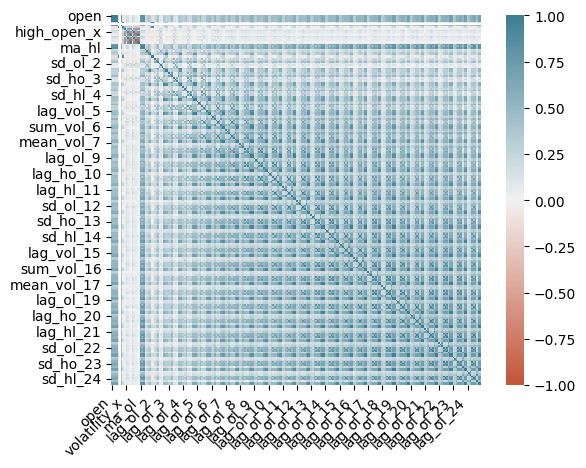

In [40]:
# %% Heatmaps
# Heat map
correlation = X_normalized.corr()
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [41]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='spearman')
print(corr2)

                 open      high       low     close  volume  \
open         1.000000  0.828571  0.600000  0.428571     NaN   
high         0.828571  1.000000  0.885714  0.600000     NaN   
low          0.600000  0.885714  1.000000  0.828571     NaN   
close        0.428571  0.600000  0.828571  1.000000     NaN   
volume            NaN       NaN       NaN       NaN     1.0   
...               ...       ...       ...       ...     ...   
sd_ho_24    -1.000000 -1.000000 -1.000000 -1.000000     NaN   
sd_hl_24          NaN       NaN       NaN       NaN     NaN   
lag_vol_24        NaN       NaN       NaN       NaN     NaN   
sum_vol_24        NaN       NaN       NaN       NaN     NaN   
mean_vol_24       NaN       NaN       NaN       NaN     NaN   

             quote_asset_volume  trades  buy_asset_volume  \
open                        NaN     NaN               NaN   
high                        NaN     NaN               NaN   
low                         NaN     NaN               NaN   

<AxesSubplot:>

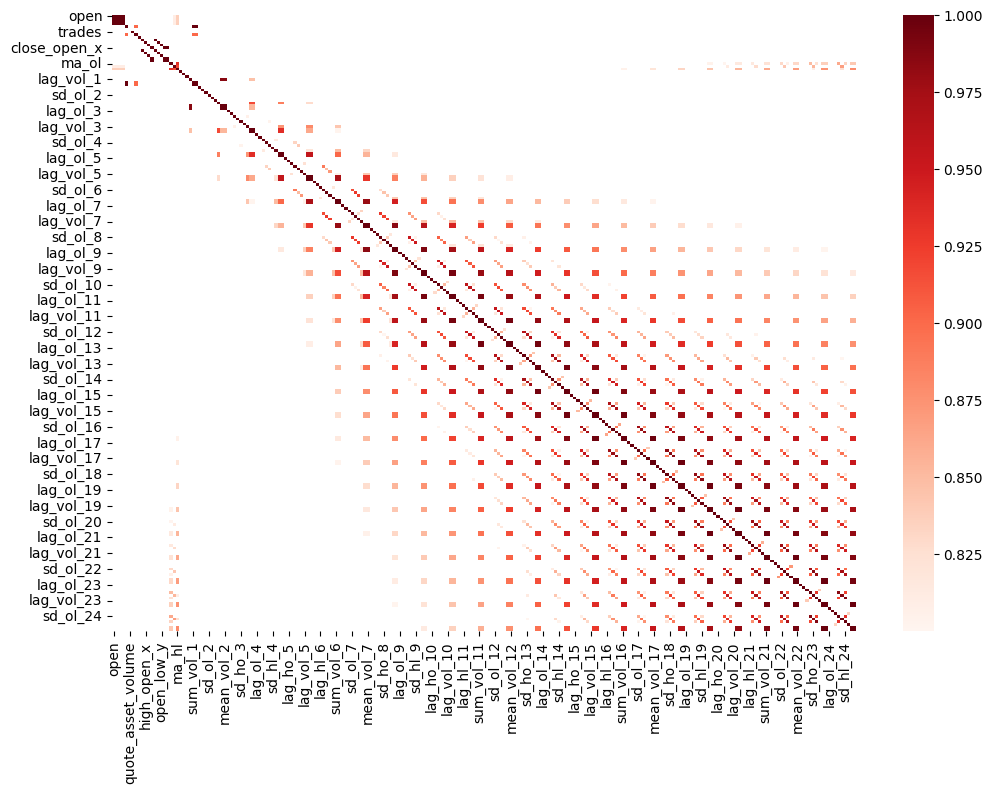

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")


                 open      high       low     close  volume  \
open         1.000000  0.828571  0.600000  0.428571     NaN   
high         0.828571  1.000000  0.885714  0.600000     NaN   
low          0.600000  0.885714  1.000000  0.828571     NaN   
close        0.428571  0.600000  0.828571  1.000000     NaN   
volume            NaN       NaN       NaN       NaN     1.0   
...               ...       ...       ...       ...     ...   
sd_ho_24    -1.000000 -1.000000 -1.000000 -1.000000     NaN   
sd_hl_24          NaN       NaN       NaN       NaN     NaN   
lag_vol_24        NaN       NaN       NaN       NaN     NaN   
sum_vol_24        NaN       NaN       NaN       NaN     NaN   
mean_vol_24       NaN       NaN       NaN       NaN     NaN   

             quote_asset_volume  trades  buy_asset_volume  \
open                        NaN     NaN               NaN   
high                        NaN     NaN               NaN   
low                         NaN     NaN               NaN   

<AxesSubplot:>

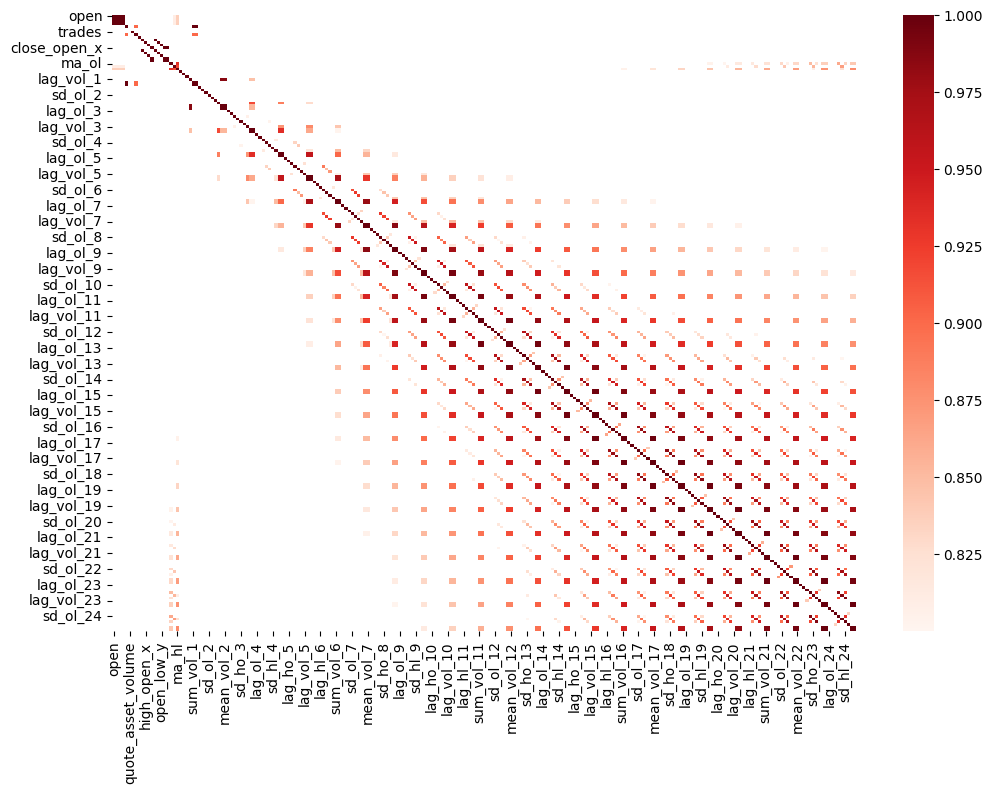

In [43]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='spearman')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")


In [44]:
cor_matrix = X_normalized.corr().abs()
print(cor_matrix)


                 open      high       low     close    volume  \
open         1.000000  0.999988  0.999985  0.999971  0.145606   
high         0.999988  1.000000  0.999990  0.999987  0.145754   
low          0.999985  0.999990  1.000000  0.999989  0.145239   
close        0.999971  0.999987  0.999989  1.000000  0.145764   
volume       0.145606  0.145754  0.145239  0.145764  1.000000   
...               ...       ...       ...       ...       ...   
sd_ho_24     0.636981  0.637283  0.636877  0.637244  0.086547   
sd_hl_24     0.593473  0.593490  0.593289  0.593287  0.001774   
lag_vol_24   0.432756  0.432710  0.433403  0.433091  0.097568   
sum_vol_24   0.710650  0.710473  0.710626  0.710451  0.193001   
mean_vol_24  0.710650  0.710473  0.710626  0.710451  0.193001   

             quote_asset_volume    trades  buy_asset_volume  \
open                        NaN  0.765206          0.103842   
high                        NaN  0.764874          0.102719   
low                         Na

In [45]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(upper_tri)

             open      high       low     close    volume  quote_asset_volume  \
open          NaN  0.999988  0.999985  0.999971  0.145606                 NaN   
high          NaN       NaN  0.999990  0.999987  0.145754                 NaN   
low           NaN       NaN       NaN  0.999989  0.145239                 NaN   
close         NaN       NaN       NaN       NaN  0.145764                 NaN   
volume        NaN       NaN       NaN       NaN       NaN                 NaN   
...           ...       ...       ...       ...       ...                 ...   
sd_ho_24      NaN       NaN       NaN       NaN       NaN                 NaN   
sd_hl_24      NaN       NaN       NaN       NaN       NaN                 NaN   
lag_vol_24    NaN       NaN       NaN       NaN       NaN                 NaN   
sum_vol_24    NaN       NaN       NaN       NaN       NaN                 NaN   
mean_vol_24   NaN       NaN       NaN       NaN       NaN                 NaN   

               trades  buy_

C:\Users\Emilio\AppData\Local\Temp\ipykernel_1028\12419535.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [46]:
# .5 according to JF, but not many features after that.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= .85)]
print();
print(to_drop)


['high', 'low', 'close', 'buy_asset_volume', 'volatility_y', 'high_open_y', 'open_low_y', 'close_open_y', 'co', 'ma_hl', 'sum_vol_1', 'mean_vol_1', 'sum_vol_2', 'mean_vol_2', 'sum_vol_3', 'mean_vol_3', 'sum_vol_4', 'mean_vol_4', 'sum_vol_5', 'mean_vol_5', 'sd_ol_6', 'sd_hl_6', 'sum_vol_6', 'mean_vol_6', 'sd_ol_7', 'sd_ho_7', 'sd_hl_7', 'sum_vol_7', 'mean_vol_7', 'sd_ol_8', 'sd_ho_8', 'sd_hl_8', 'sum_vol_8', 'mean_vol_8', 'sd_ol_9', 'sd_ho_9', 'sd_hl_9', 'sum_vol_9', 'mean_vol_9', 'sd_ol_10', 'sd_ho_10', 'sd_hl_10', 'sum_vol_10', 'mean_vol_10', 'sd_ol_11', 'sd_ho_11', 'sd_hl_11', 'sum_vol_11', 'mean_vol_11', 'sd_ol_12', 'sd_ho_12', 'sd_hl_12', 'sum_vol_12', 'mean_vol_12', 'sd_ol_13', 'sd_ho_13', 'sd_hl_13', 'sum_vol_13', 'mean_vol_13', 'sd_ol_14', 'sd_ho_14', 'sd_hl_14', 'sum_vol_14', 'mean_vol_14', 'sd_ol_15', 'sd_ho_15', 'sd_hl_15', 'lag_vol_15', 'sum_vol_15', 'mean_vol_15', 'sd_ol_16', 'sd_ho_16', 'sd_hl_16', 'lag_vol_16', 'sum_vol_16', 'mean_vol_16', 'sd_ol_17', 'sd_ho_17', 'sd_hl_

In [47]:
# Choose transformation
# x = X_standard.copy()
x = X_scale.copy()
# x = X_normalized.copy()
# x = X.copy()

# Drop highly correlated
x = x.drop(x[to_drop], axis=1)
print();
print(x.head())
x.head()


                         open    volume  quote_asset_volume    trades  \
timestamp                                                               
2022-08-02 00:00:00  0.692059  0.119653            0.130562  0.171727   
2022-08-02 01:00:00  0.677281  0.095886            0.103366  0.147369   
2022-08-02 02:00:00  0.641756  0.123559            0.132091  0.172443   
2022-08-02 03:00:00  0.626056  0.112457            0.119514  0.174307   
2022-08-02 04:00:00  0.614568  0.088953            0.094256  0.139555   

                     taker_buy_asset_volume  volatility_x  high_open_x  \
timestamp                                                                
2022-08-02 00:00:00                0.125868      0.186486     0.193519   
2022-08-02 01:00:00                0.089342      0.196543     0.061412   
2022-08-02 02:00:00                0.122356      0.162469     0.089125   
2022-08-02 03:00:00                0.104569      0.077425     0.010001   
2022-08-02 04:00:00                0.085077

open    volume  quote_asset_volume    trades  \
timestamp                                                               
2022-08-02 00:00:00  0.692059  0.119653            0.130562  0.171727   
2022-08-02 01:00:00  0.677281  0.095886            0.103366  0.147369   
2022-08-02 02:00:00  0.641756  0.123559            0.132091  0.172443   
2022-08-02 03:00:00  0.626056  0.112457            0.119514  0.174307   
2022-08-02 04:00:00  0.614568  0.088953            0.094256  0.139555   

                     taker_buy_asset_volume  volatility_x  high_open_x  \
timestamp                                                                
2022-08-02 00:00:00                0.125868      0.186486     0.193519   
2022-08-02 01:00:00                0.089342      0.196543     0.061412   
2022-08-02 02:00:00                0.122356      0.162469     0.089125   
2022-08-02 03:00:00                0.104569      0.077425     0.010001   
2022-08-02 04:00:00                0.085077      0.083910     0.053102   

                     open_low_x  close_open_x     ma_ol  ...  lag_ho_22  \
timestamp                                                ...              
2022-08-02 00:00:00    0.078532      0.465865  0.414101  ...   0.051132   
2022-08-02 01:00:00    0.179027      0.402783  0.465066  ...   0.017936   
2022-08-02 02:00:00    0.126652      0.463064  0.494759  ...   0.044086   
2022-08-02 03:00:00    0.097688      0.476870  0.516021  ...   0.036515   
2022-08-02 04:00:00    0.074462      0.517001  0.514686  ...   0.017594   

                     lag_hl_22  lag_ol_23  lag_ho_23  lag_hl_23  lag_vol_23  \
timestamp                                                                     
2022-08-02 00:00:00   0.042173   0.039038   0.071456   0.060591    0.055706   
2022-08-02 01:00:00   0.063285   0.034953   0.051132   0.042173    0.046976   
2022-08-02 02:00:00   0.025503   0.078400   0.017936   0.063285    0.034643   
2022-08-02 03:00:00   0.084668   0.023469   0.044086   0.025503    0.045772   
2022-08-02 04:00:00   0.118052   0.086585   0.036515   0.084668    0.056448   

                     lag_ol_24  lag_ho_24  lag_hl_24  lag_vol_24  
timestamp                                                         
2022-08-02 00:00:00   0.028649   0.105594   0.073905    0.089936  
2022-08-02 01:00:00   0.039038   0.071456   0.060591    0.055706  
2022-08-02 02:00:00   0.034953   0.051132   0.042173    0.046976  
2022-08-02 03:00:00   0.078400   0.017936   0.063285    0.034643  
2022-08-02 04:00:00   0.023469   0.044086   0.025503    0.045772  

[5 rows x 115 columns]

Next we split the dataset, as this is a timeseries we require to split it without changing the timeline or it would influence the forecasting.

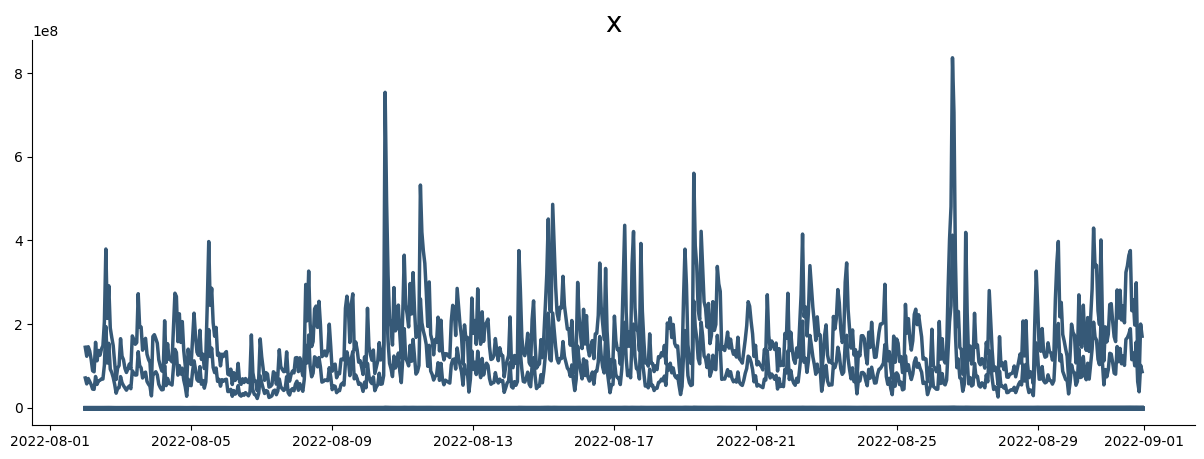

In [48]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('x', size=20)
plt.plot(X)

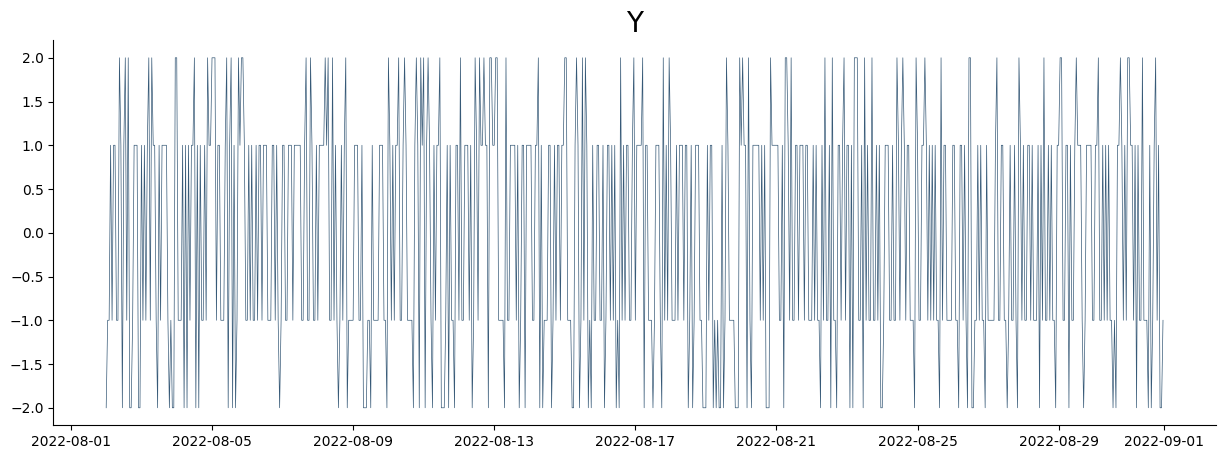

In [49]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = .5
plt.title('Y', size=20)
plt.plot(y)

In [50]:
test_size = int(len(x) * .20)
X_train = x[:-test_size].copy()
X_test = x[-test_size:].copy()
X_train2 = x[:-test_size].copy()
X_test2 = x[-test_size:].copy()
X_train3 = x[:-test_size].copy()
X_test3 = x[-test_size:].copy()


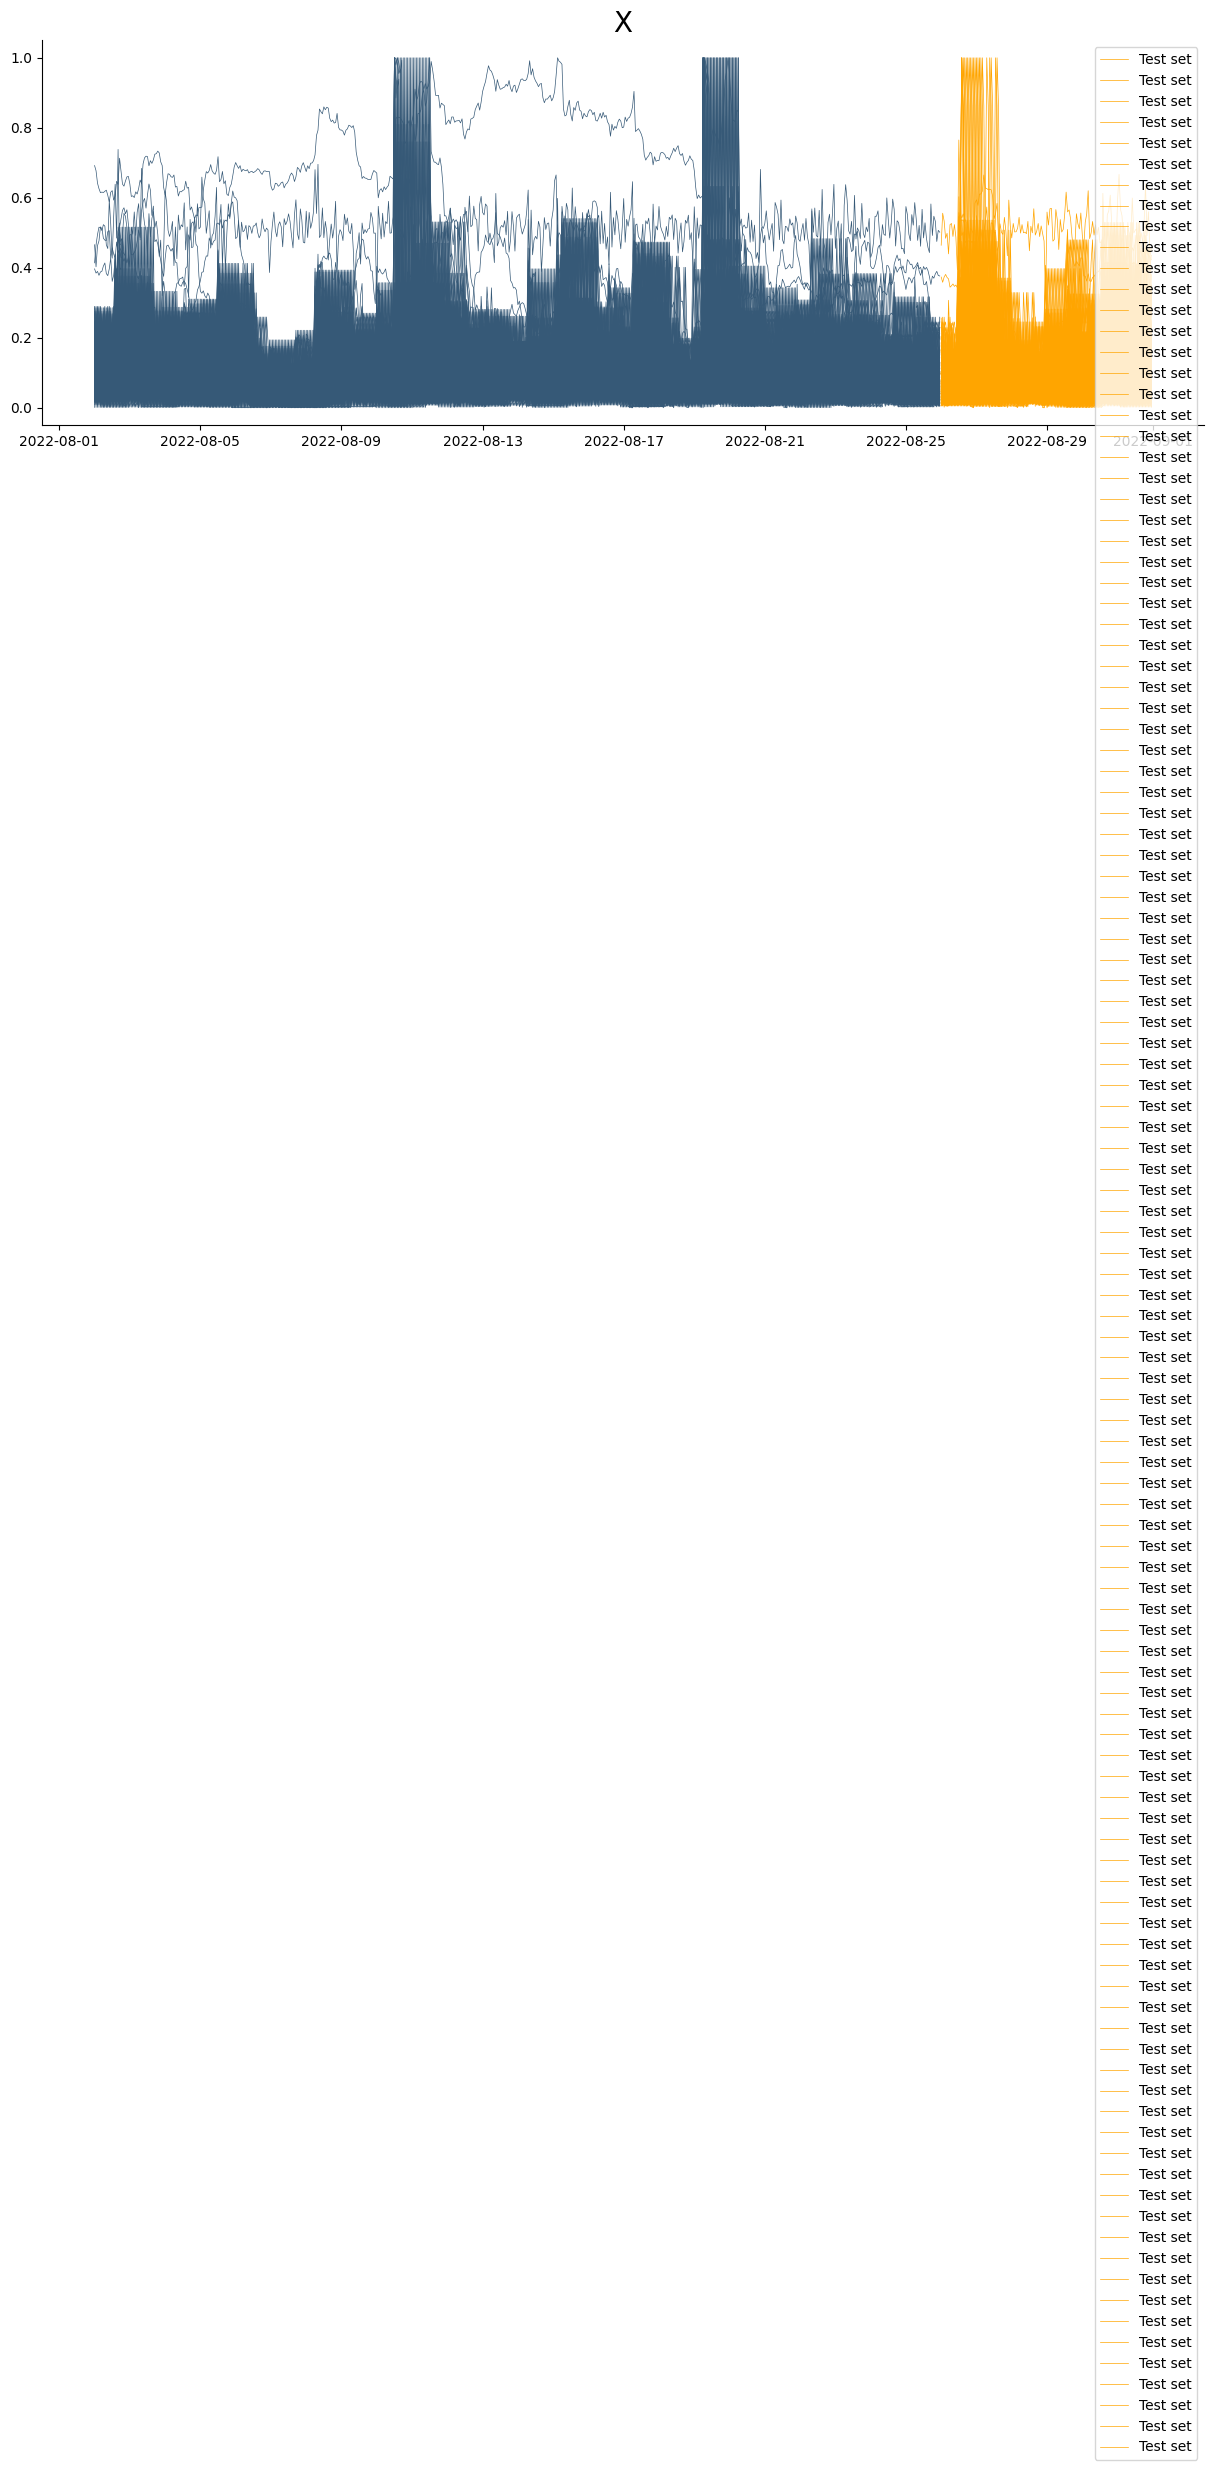

In [51]:
plt.title('X', size=20)
plt.plot(X_train)  # ,label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.legend(loc='upper right');


In [52]:
y_train = y[:-test_size].copy()
y_test = y[-test_size:].copy()
y_train2 = y[:-test_size].copy()
y_test2 = y[-test_size:].copy()
y_train3 = y[:-test_size].copy()
y_test3 = y[-test_size:].copy()
X_train4 = X_train.copy()
y_train4 = y_train.copy()
X_test4 = X_test.copy()
y_test4 = y_test.copy()
Y_train_dum = pd.get_dummies(y_train4, prefix='y')
Y_test_dum = pd.get_dummies(y_test4, prefix='y')

In [68]:
Y_train_dum

y_-2.0  y_-1.0  y_1.0  y_2.0
timestamp                                        
2022-08-02 00:00:00       1       0      0      0
2022-08-02 01:00:00       0       1      0      0
2022-08-02 02:00:00       0       1      0      0
2022-08-02 03:00:00       0       0      1      0
2022-08-02 04:00:00       0       1      0      0
...                     ...     ...    ...    ...
2022-08-25 19:00:00       0       0      1      0
2022-08-25 20:00:00       0       1      0      0
2022-08-25 21:00:00       0       1      0      0
2022-08-25 22:00:00       0       1      0      0
2022-08-25 23:00:00       0       1      0      0

[576 rows x 4 columns]

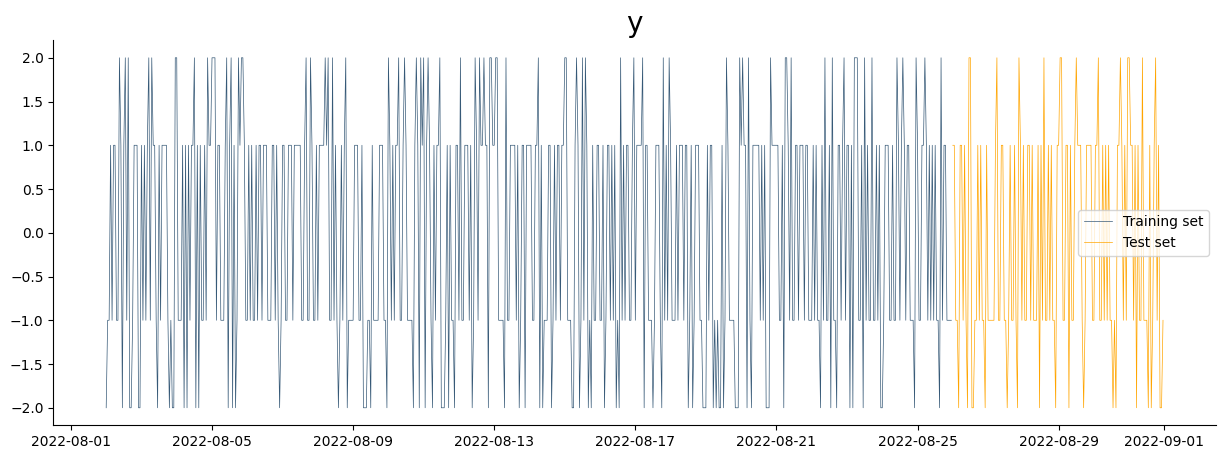

In [53]:
plt.title('y', size=20)
plt.plot(y_train, label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.legend();


In [54]:
# %% Naive Bayes
print(X_train.shape, X_test.shape)
# instantiate the model
gnb = GaussianNB()
# gnb = CategoricalNB()
# pgmpy()

# fit the model
gnb.fit(X_train2, y_train2)

(576, 115) (144, 115)


GaussianNB()

In [55]:
y_pred2 = gnb.predict(X_test2)

In [56]:
accuracy_naive = (accuracy_score(y_test2, y_pred2)) * 100
recall_naive = recall_score(y_test2, y_pred2, average='weighted') * 100
precision_naive = precision_score(y_test2, y_pred2, average='weighted', zero_division=0) * 100
f1_naive = f1_score(y_test2, y_pred2, average='weighted') * 100
balanced_naive = balanced_accuracy_score(y_test2, y_pred2) * 100
print('Accuracy:', accuracy_naive, '%')
print('Recall:', recall_naive, '%')
print('Precision:', precision_naive, '%')
print('F1:', f1_naive, '%')
print('Balanced Accuracy:', balanced_naive, '%')

Accuracy: 24.305555555555554 %
Recall: 24.305555555555554 %
Precision: 25.988857539756104 %
F1: 23.974568573104175 %
Balanced Accuracy: 22.61943028577551 %


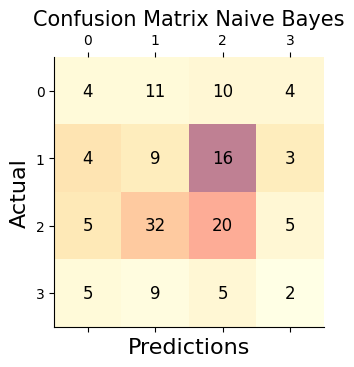

In [57]:
y_pred_train = gnb.predict(X_train2)
conf_mat = confusion_matrix(y_test2, y_pred2)
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m, y=n, s=conf_mat[m, n], va='center', ha='center', size='large')
# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Naive Bayes', fontsize=15)
plt.show()

The logistic Regression was chosen because of the type of target variable which is  categorical feature. 
* The cost function in this case is the following one:
$$ \underset{w,c}{min}\frac{1-p}{2}{w}^{T}w+\rho||w||_1+C\sum_{i=1}^{n}log(exp(-y_i(\mathrm{X}_{i}^{T}w+c))+1) $$

This cost function is the one used for Elastic Net regularization, which is a combination of the L1 and L2 penalizations.

In [58]:
# model fit
logistic_model = LogisticRegression(random_state=False, penalty='elasticnet',
                                    solver='saga', l1_ratio=.56, max_iter=1000000, C=1,
                                    class_weight='balanced', )
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.56,
                   max_iter=1000000, penalty='elasticnet', random_state=False,
                   solver='saga')

In [59]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
print(accuracy)


27.083333333333332


In [60]:
logistic_model.get_params(deep=True)

{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.56,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': False,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
# si fueron 0 se quitaron por efecto de la regularizacion L1 y son:
# si
coef = logistic_model.coef_
print(logistic_model.intercept_)
print(coef)

[-1.10145351  0.59073684  0.53647029 -0.02575361]
[[ 3.20272135e-01  4.93733433e-01  7.33776218e-01  1.26294005e+00
   8.27028491e-01  0.00000000e+00  2.57751517e-02  0.00000000e+00
   0.00000000e+00  3.58841898e-01  0.00000000e+00  1.98202325e-01
  -5.66562170e-01  0.00000000e+00 -5.72904942e-02 -2.34229790e-01
   0.00000000e+00 -6.05517713e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.57466745e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.49384012e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.31518919e+00  2.13193405e-01  0.00000000e+00
  -2.51939855e-01  1.07505713e-01  0.00000000e+00  0.00000000e+00
   5.42429943e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.04641354e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.51670411e-01
   0.00000000e+00  0.00000

In [62]:
predict_ = logistic_model.predict_proba(X_train)
print(predict_)

[[0.15347639 0.22187834 0.2088658  0.41577947]
 [0.17731653 0.28666338 0.19272529 0.3432948 ]
 [0.27905996 0.21576506 0.2268079  0.27836708]
 ...
 [0.11766923 0.28829177 0.24711424 0.34692476]
 [0.21356818 0.291757   0.28762621 0.20704861]
 [0.14613618 0.29764735 0.31515781 0.24105866]]


(1.0, 30000.0, -3.0, 3.0)

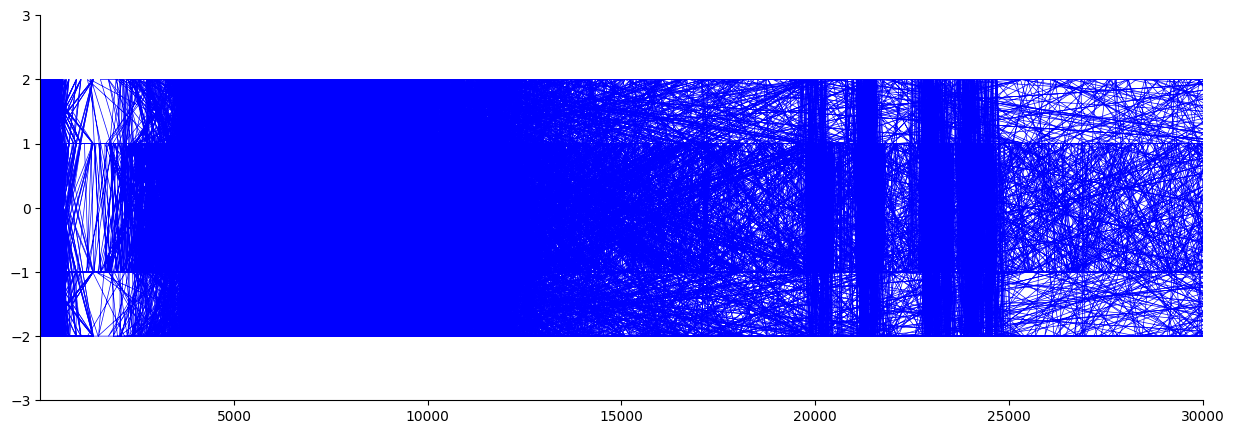

In [63]:
# ver como funciona con cada clase, resultados no son fuertes,
# 1) analisis de los coeficientes por efectos de la regularizacion ( estos se quitaron , estos se redujeron)
# 2) analisis probabilistico para cada clase.

plt.plot(X_test, y_pred, 'r')
plt.plot(X, y_true, 'b')
plt.axis([1, 30000, -3, 3])


In [64]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred) * 100
logistic_model.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)

In [65]:
recall_logistic = recall_score(y_test, y_pred, average='weighted') * 100
precision_logistic = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
f1_logistic = f1_score(y_test, y_pred, average='weighted') * 100
balanced_logistic = balanced_accuracy_score(y_test, y_pred) * 100

print('Accuracy:', accuracy_logistic, '%')
print('Recall:', recall_logistic, '%')
print('Precision:', precision_logistic, '%')
print('F1:', f1_logistic, '%')
print('Balanced Accuracy:', balanced_logistic, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 27.083333333333332 %
Recall: 27.083333333333332 %
Precision: 32.60190254963774 %
F1: 27.68497474747475 %
Balanced Accuracy: 29.777020097656546 %
Confusion Matrix:
[[ 5  5  4  4]
 [12 20 12 17]
 [10 19  8 14]
 [ 3  5  0  6]]


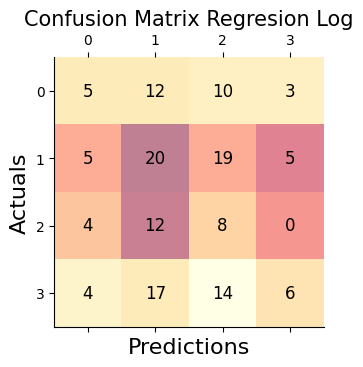

In [66]:
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(confusion_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mat.shape[0]):
    for n in range(confusion_mat.shape[1]):
        px.text(x=m, y=n, s=confusion_mat[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Regresion Log', fontsize=15)
plt.show()

## Random Forest

In [67]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                             max_features=None, min_samples_split=2,
                             oob_score=True,n_jobs=4)

# Train the model using the training sets
clf.fit(X_train3, y_train3)

# performing predictions on the test dataset
y_pred = clf.predict(X_test3)
accuracy_forest = accuracy_score(y_test3, y_pred) * 100
print(clf.score(x, y))

KeyboardInterrupt: 

In [ ]:
confusion_mat = confusion_matrix(y_test3, y_pred)

In [ ]:
recall_forest = recall_score(y_test3, y_pred, average='weighted') * 100
precision_forest = precision_score(y_test3, y_pred, average='weighted', zero_division=0) * 100
f1_forest = f1_score(y_test3, y_pred, average='weighted') * 100
balanced_forest = balanced_accuracy_score(y_test3, y_pred) * 100

print('Accuracy:', accuracy_forest, '%')
print('Recall:', recall_forest, '%')
print('Precision:', precision_forest, '%')
print('F1:', f1_forest, '%')
print('Balanced Accuracy:', balanced_forest, '%')
print("Confusion Matrix:")

print(confusion_mat)

## Multilayer perceptron for Classification

In [84]:
neuron_quant = [n_inputs, n_inputs+2,n_inputs+4,n_inputs+8,n_inputs+16,n_inputs+32,n_inputs+64]
quant_hidden = [1,2]
learning rate
batch size

In [99]:
recc = []
for i in neuron_quant:
    
    # Agregar: learning rate, momentum, nesterov, dropout, modificar capas, neuronas por capa, funcion activacion
    # por capa.
    n_inputs = len(list(X_train4.columns))
    # Neural network structure
    model = Sequential()
    model.add(Dense(n_inputs, activation='sigmoid', input_shape=(n_inputs,)))
    # model.add(Dense(10, activation='softplus'))
    model.add(Dense(i, activation='sigmoid'))
    model.add(Dense(4, activation='softmax'))
    # Optimizer configuration
    # model.compile(loss='binary_crossentropy',
    # with no one hot encoding
    #model.compile(loss='sparse_categorical_crossentropy',
    #              optimizer='Adam',
    #              metrics=['accuracy'])
    # with one hot encoding
    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    model_history = model.fit(X_train4, Y_train_dum, epochs=20, batch_size=16, verbose=1)
    recc.append(model_history)

Epoch 1/20
576/576 [==============================] - 1s 1ms/step - loss: 1.3380 - accuracy: 0.3403
Epoch 2/20
576/576 [==============================] - 1s 1ms/step - loss: 1.3003 - accuracy: 0.4132
Epoch 3/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2949 - accuracy: 0.3681
Epoch 4/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2972 - accuracy: 0.3767
Epoch 5/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2932 - accuracy: 0.3628
Epoch 6/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2723 - accuracy: 0.3698
Epoch 7/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2559 - accuracy: 0.3976
Epoch 8/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2423 - accuracy: 0.4271
Epoch 9/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2419 - accuracy: 0.3854
Epoch 10/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2311 - accuracy: 0.4375

576/576 [==============================] - 1s 1ms/step - loss: 1.3232 - accuracy: 0.3837
Epoch 3/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2909 - accuracy: 0.3976
Epoch 4/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2885 - accuracy: 0.3681
Epoch 5/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2810 - accuracy: 0.3663
Epoch 6/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2683 - accuracy: 0.3802
Epoch 7/20
576/576 [==============================] - 1s 2ms/step - loss: 1.2667 - accuracy: 0.3906
Epoch 8/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2602 - accuracy: 0.3854
Epoch 9/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2458 - accuracy: 0.3941
Epoch 10/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2337 - accuracy: 0.4097
Epoch 11/20
576/576 [==============================] - 1s 1ms/step - loss: 1.2267 - accuracy: 0.4323
Epoch 12/

In [101]:
recc

In [ ]:
import pickle


In [97]:
# Neural network training
# In time series, batch size is defined in multiples of 16(search Yann Lecun Bibliography)
# In time series batch size represents a period of time in which there can be a change on the statistical 
# data structure.
model_history = model.fit(X_train4, Y_train_dum, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
576/576 [==============================] - 1s 1ms/step - loss: 1.3573 - accuracy: 0.3299
Epoch 2/50
576/576 [==============================] - 1s 1ms/step - loss: 1.3077 - accuracy: 0.3802
Epoch 3/50
576/576 [==============================] - 1s 1ms/step - loss: 1.3129 - accuracy: 0.3455
Epoch 4/50
576/576 [==============================] - 1s 1ms/step - loss: 1.2894 - accuracy: 0.4132
Epoch 5/50
576/576 [==============================] - 1s 2ms/step - loss: 1.2830 - accuracy: 0.3750
Epoch 6/50
576/576 [==============================] - 1s 1ms/step - loss: 1.2661 - accuracy: 0.4167
Epoch 7/50
576/576 [==============================] - 1s 1ms/step - loss: 1.2616 - accuracy: 0.4062
Epoch 8/50
576/576 [==============================] - 1s 1ms/step - loss: 1.2537 - accuracy: 0.3750
Epoch 9/50
576/576 [==============================] - 1s 1ms/step - loss: 1.2522 - accuracy: 0.4149
Epoch 10/50
576/576 [==============================] - 1s 1ms/step - loss: 1.2296 - accuracy: 0.4340

KeyboardInterrupt: 

In [ ]:
# %% View the training performance

fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'), plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'), plt.ylabel('Accuracy function')

In [ ]:
# %% Neural network weights
model.layers[0].get_weights()
# model.get_config() #model configuration
# %% View the model
plot_model(model)
# plot_model(model, to_file='../figures/P9_fig/model.png', show_shapes=True)
# %% Use the model
# Latest version
Y_prob = model.predict(X_test4)
Y_pred = np.argmax(Y_prob, axis=1)

In [ ]:
# %% View the neural network prediction
indx = 0
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(np.reshape(X_test4[indx, :], (8, 8)), cmap=plt.cm.gray_r)
plt.subplot(122)
plt.bar(np.arange(10), Y_prob[indx, :])
plt.ylim([0, 1])
plt.title('Prediction: %d' % np.argmax(Y_prob[indx, :]))

In [ ]:
score = model.evaluate(X_test4, Y_test_dum, verbose=1)
print(score)

In [ ]:
# %% More metrics

Yhat_train = np.argmax(model.predict(X_train4), axis=1)
Yhat_test = np.argmax(model.predict(X_test4), axis=1)
accu_train = accuracy_score(y_train4, Yhat_train)
prec_train = precision_score(y_train4, Yhat_train, average='weighted',zero_division = 0)
reca_train = recall_score(y_train4, Yhat_train, average='weighted')
accu_test = accuracy_score(y_test4, Yhat_test)
prec_test = precision_score(y_test4, Yhat_test, average='weighted')
reca_test = recall_score(y_test4, Yhat_test, average='weighted')
print(' \t\t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f' % (accu_train,
                                                                                                            prec_train,
                                                                                                            reca_train,
                                                                                                            accu_test,
                                                                                                            prec_test,
                                                                                                            reca_test))


## Scores

In [ ]:
results = {'Accuracy': [accuracy_martingala, accuracy_logistic, accuracy_naive, accuracy_forest],
           'Recall': [recall_martingala, recall_logistic, recall_naive, recall_forest],
           'Precision': [precision_martingala, precision_logistic, precision_naive, precision_forest],
           'F1': [f1_martingala, f1_logistic, f1_naive, f1_forest],
           'Balanced Accuracy': [balanced_martingala, balanced_logistic, balanced_naive, balanced_forest]
           }

table = pd.DataFrame(results, index=['Martingale', 'Logistic Regression', 'Naive Bayes', 'Random Forest'])
print(table)